<a href="https://colab.research.google.com/github/silver-ye/base/blob/main/_Pandas_%ED%95%9C%EB%B2%88%EC%97%90_%EC%A0%9C%EB%8C%80%EB%A1%9C_%EB%B0%B0%EC%9A%B0%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 한번에 제대로 배우기




---



- **출처**: Pandas 한번에 끝내기 - 데이터 과학의 핵심 패키지, 데이터 처리, 연산, 집계 (이수안컴퓨터연구소)
url = https://www.youtube.com/watch?v=lG8pEwvYwCw


Pandas 특징
- 부동 소수점이 아닌 데이터뿌난 아니라 부동 소숫점 데이터에서도 결측데이터를 쉽게 처리
- 크기 변이성: DataFrame 및 고차원 객체에서 열을 삽입 및 삭제 가능
- 자동 및 명시적 데이터 정렬: 객체를 라벨 집합에 명시적으로 정렬하거나, 사용자가 라벨을 무시하고 Series, DataFrame등의 계산에서 자동으로 데이터 조정 가능
- 직관적인 데이터 세트 병합 및 피벗


In [3]:
# pandas는 numpy를 기반으로 만들어짐
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

## Pandas 객체


### Series 객체

In [4]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0])
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [5]:
# value값만 보기
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [6]:
# index값만 보기
s.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
# 개별 접근이 가능
s[1]

0.25

In [8]:
# 슬라이싱도 가능
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [9]:
# 인덱스를 지정해서 값을 주기가 가능하다.
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0], 
              index=['a', 'b', 'c', 'd', 'e'])
s


a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [10]:
s['c']

0.5

In [11]:
s[['c', 'd', 'e']]

c    0.50
d    0.75
e    1.00
dtype: float64

In [12]:
# in도 사용 가능
'b' in s

True

In [13]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = [2, 4, 6, 8, 10])
s

2     0.00
4     0.25
6     0.50
8     0.75
10    1.00
dtype: float64

In [14]:
s[4]

0.25

In [15]:
s[2:]

6     0.50
8     0.75
10    1.00
dtype: float64

In [16]:
# unique한 값만 출력하는데, 현재는 다 unique값이기에 전체가 출력됨
s.unique()

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [17]:
# count를 사용하기
# 현재는 다 값이 하나여서 1로 표시된다.
s.value_counts()

1.00    1
0.75    1
0.50    1
0.25    1
0.00    1
dtype: int64

In [18]:
# 값이 어디에 들었는지 블리언 형태로 나타낸다.
s.isin([0.25, 0.75])

2     False
4      True
6     False
8      True
10    False
dtype: bool

In [19]:
# tuple 값을 이용하기
pop_tuple = {'서울특별시' : 9720846,
          '부산광역시' : 3484423,
          '인천광역시' : 2947217,
          '대구광역시' : 2427954,
          '대전광역시' : 1471040,
          '광주광역시' : 145048}
population = pd.Series(pop_tuple)
population


서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시     145048
dtype: int64

In [20]:
population['서울특별시']

9720846

In [21]:
# 슬라이싱도 가능
population['서울특별시':'인천광역시']

서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
dtype: int64

### DataFrame 객체

In [22]:
# Series는 하나의 단일한 형태의 객체를 가짐
# DataFrame은 여러 컬럼이 들어간 2차원성 특징을 가짐
# 알아서 비어있는 값을 인식하고 누락값을 NaN으로 표시한다.
pd.DataFrame([{'A':2, 'B':4, 'D':5}, {'A':4, 'B':5, 'C':7}])

,A,B,D,C
0,2,4,5.0,NaN
1,4,5,NaN,7.0


In [23]:
# 랜덤값을 가지는 데이터프레임 생성
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index=[1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.884814,0.293826,0.151597,0.920375,0.287494
2,0.794413,0.766436,0.568891,0.128685,0.106656
3,0.105125,0.175879,0.313454,0.903684,0.613308
4,0.256418,0.301792,0.336975,0.157670,0.261140
5,0.853951,0.513679,0.342537,0.948574,0.274934


In [24]:
male_tuple = {'서울특별시' : 4732275,
              '부산광역시' : 1668618,
              '인천광역시' : 1476813,
              '대구광역시' : 1198815,
              '대전광역시' : 774441,
              '광주광역시' : 720060}
male = pd.Series(male_tuple)
male

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
dtype: int64

In [25]:
female_tuple = {'서울특별시' : 4988571,
              '부산광역시' : 1735885,
              '인천광역시' : 1470404,
              '대구광역시' : 1229139,
              '대전광역시' : 736599,
              '광주광역시' : 734988}
female = pd.Series(female_tuple)
female

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
dtype: int64

In [26]:
# 결합을 통해서 한 컬럼이 하나의 시리즈를 구성
korea_df = pd.DataFrame({'인구수': population,
                         '남자인구수': male,
                         '여자인구수': female})
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,774441,736599
광주광역시,145048,720060,734988


In [27]:
korea_df.index

Index(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시'], dtype='object')

In [28]:
korea_df.columns

Index(['인구수', '남자인구수', '여자인구수'], dtype='object')

In [29]:
# 여자인구수만 보기
korea_df['여자인구수']

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [30]:
# 서울특별시 ~ 인천광역시
korea_df['서울특별시' : '인천광역시']

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404


### Index 객체


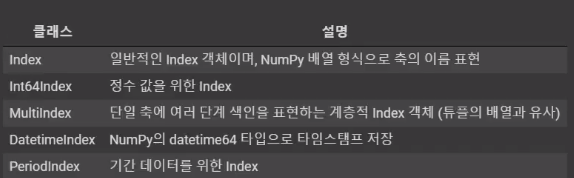

In [31]:
# 정수값들을 넣어서 int64index가 됨
idx = pd.Index([2, 4, 6, 8, 10])
idx

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [32]:
idx[1]

4

In [33]:
idx[1:2:2]

Int64Index([4], dtype='int64')

In [34]:
idx[-1::]

Int64Index([10], dtype='int64')

In [35]:
# step을 줘서 2씩 넘어가기
idx[::2]

Int64Index([2, 6, 10], dtype='int64')

In [36]:
print(idx)
# 값을 나타냄
print(idx.size)
# 1차원의 구조인지 알 수 있음
print(idx.shape)
# 11차원이라서 1
print(idx.ndim)
# 정수가 들어가서 int64
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

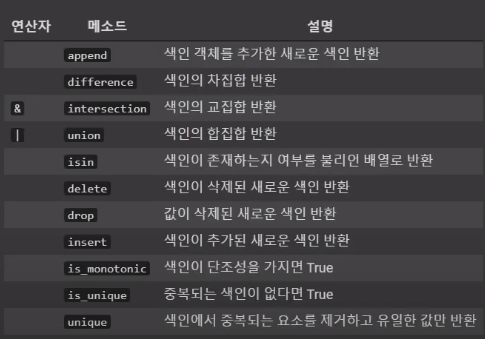

In [37]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
# 2개를 결합
print(idx1.append(idx2))
# 차집합
print(idx1.difference(idx2))
# 값이 마이너스
print(idx1 - idx2)
# 교집합
print(idx1.intersection(idx2))
print(idx1 & idx2)
# 중복을 뺀 합집합
print(idx1.union(idx2))
print(idx1 | idx2)
# 값을 빼기
print(idx1.delete(0))
print(idx1.drop(1))
# 여집합
print(idx1 ^ idx2)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([-1, -2, -1, 0, 1], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')




---



## 인덱싱(Indexing)

In [38]:
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index = ['a', 'b', 'c', 'd', 'e'])
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [39]:
s['b']

0.25

In [40]:
'b' in s

True

In [41]:
# 해당하는 인덱스값을 알 수 있음
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [42]:
# items는 zip으로 묶여서 오니 리스트로 물어줘야함
s.items()
list(s.items())

[('a', 0.0), ('b', 0.25), ('c', 0.5), ('d', 0.75), ('e', 1.0)]

In [43]:
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [44]:
# 슬라이싱 가능
s['a' : 'd']

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [45]:
# 숫자로도 슬라이싱 가능
s[0:4]

a    0.00
b    0.25
c    0.50
d    0.75
dtype: float64

In [46]:
# 특정 조건을 주어서 해당하는 값만 뽑기
s[(s > 0.4) & (s < 0.8)]

c    0.50
d    0.75
dtype: float64

In [47]:
# 인덱스값으로만 부분 출력 가능
s[['a', 'c', 'e']]

a    0.0
c    0.5
e    1.0
dtype: float64

### Series 인덱싱

In [48]:
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index = [1,3, 5, 7, 9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [49]:
s[1]

'a'

In [50]:
s[2:4]

5    c
7    d
dtype: object

In [51]:
# iloc는 정수로 되서 지정해준 인덱스가 아닌 원래 인덱스값을 받아서 b가 나옴
s.iloc[1]

'b'

In [52]:
s.iloc[2:4]

5    c
7    d
dtype: object

In [53]:
# 인덱스를 재구성
s.reindex(range(10))

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [54]:
# NaN값에 method = 'bfill'을 사용해서 그전에 값을 받음
s.reindex(range(10), method = 'bfill')

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame 인덱싱


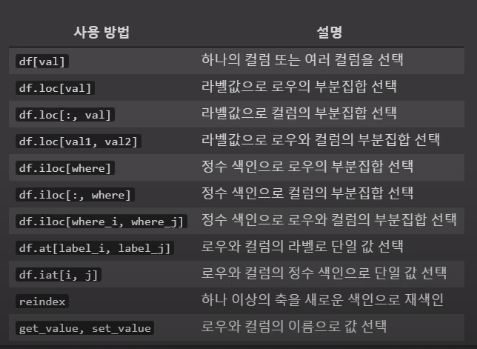

In [55]:
korea_df

,인구수,남자인구수,여자인구수
서울특별시,9720846,4732275,4988571
부산광역시,3484423,1668618,1735885
인천광역시,2947217,1476813,1470404
대구광역시,2427954,1198815,1229139
대전광역시,1471040,774441,736599
광주광역시,145048,720060,734988


In [56]:
korea_df['남자인구수']

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [57]:
# .을 통해서도 가져올 수 있음
korea_df.남자인구수

서울특별시    4732275
부산광역시    1668618
인천광역시    1476813
대구광역시    1198815
대전광역시     774441
광주광역시     720060
Name: 남자인구수, dtype: int64

In [58]:
korea_df.여자인구수

서울특별시    4988571
부산광역시    1735885
인천광역시    1470404
대구광역시    1229139
대전광역시     736599
광주광역시     734988
Name: 여자인구수, dtype: int64

In [59]:
korea_df['남녀비율'] = (korea_df['남자인구수'] * 100 / korea_df['여자인구수'])

In [60]:
korea_df.남녀비율

서울특별시     94.862336
부산광역시     96.124916
인천광역시    100.435867
대구광역시     97.532907
대전광역시    105.137395
광주광역시     97.968946
Name: 남녀비율, dtype: float64

In [61]:
korea_df.values

array([[9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01],
       [3.48442300e+06, 1.66861800e+06, 1.73588500e+06, 9.61249161e+01],
       [2.94721700e+06, 1.47681300e+06, 1.47040400e+06, 1.00435867e+02],
       [2.42795400e+06, 1.19881500e+06, 1.22913900e+06, 9.75329072e+01],
       [1.47104000e+06, 7.74441000e+05, 7.36599000e+05, 1.05137395e+02],
       [1.45048000e+05, 7.20060000e+05, 7.34988000e+05, 9.79689464e+01]])

In [62]:
korea_df.T

,서울특별시,부산광역시,인천광역시,대구광역시,대전광역시,광주광역시
인구수,9.720846e+06,3.484423e+06,2.947217e+06,2.427954e+06,1.471040e+06,145048.000000
남자인구수,4.732275e+06,1.668618e+06,1.476813e+06,1.198815e+06,7.744410e+05,720060.000000
여자인구수,4.988571e+06,1.735885e+06,1.470404e+06,1.229139e+06,7.365990e+05,734988.000000
남녀비율,9.486234e+01,9.612492e+01,1.004359e+02,9.753291e+01,1.051374e+02,97.968946


In [63]:
korea_df.values[0]

array([9.72084600e+06, 4.73227500e+06, 4.98857100e+06, 9.48623363e+01])

In [64]:
korea_df['인구수']

서울특별시    9720846
부산광역시    3484423
인천광역시    2947217
대구광역시    2427954
대전광역시    1471040
광주광역시     145048
Name: 인구수, dtype: int64

In [65]:
korea_df.loc[:'인천광역시', :'남자인구수']

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3484423,1668618
인천광역시,2947217,1476813


In [66]:
# 여자인구수가 1000000이상
korea_df.loc[(korea_df.여자인구수 > 1000000)]

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907


In [67]:
# 인수수가 2000000 이하
korea_df.loc[(korea_df.인구수 < 2000000)]

,인구수,남자인구수,여자인구수,남녀비율
대전광역시,1471040,774441,736599,105.137395
광주광역시,145048,720060,734988,97.968946


In [68]:
# 인구수가 2500000 이상
korea_df.loc[(korea_df.인구수 > 2500000)]

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867


In [69]:
korea_df.loc[korea_df.남녀비율 > 100]

,인구수,남자인구수,여자인구수,남녀비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,774441,736599,105.137395


In [70]:
# 인구수가 250000 이상이고 남녀비율이 100이상
korea_df.loc[(korea_df.인구수 > 250000) & (korea_df.남녀비율 > 100)]

,인구수,남자인구수,여자인구수,남녀비율
인천광역시,2947217,1476813,1470404,100.435867
대전광역시,1471040,774441,736599,105.137395


In [71]:
# 컬럼의 이름 혹은 인덱스로도 접근이 가능
korea_df.iloc[:3, :2]

,인구수,남자인구수
서울특별시,9720846,4732275
부산광역시,3484423,1668618
인천광역시,2947217,1476813


### 다중 인덱싱(Multi Indexing)

* 1차원의 Series와 2차원의 DataFrame 객체를 넘어 3차원, 4차원 이상의 고차원 데이터 처리
* 단일 인덱스 내에 여러 인덱스를 포함하는 다중 인덱싱

#### 다중 인덱스 Series

In [72]:
korea_df

,인구수,남자인구수,여자인구수,남녀비율
서울특별시,9720846,4732275,4988571,94.862336
부산광역시,3484423,1668618,1735885,96.124916
인천광역시,2947217,1476813,1470404,100.435867
대구광역시,2427954,1198815,1229139,97.532907
대전광역시,1471040,774441,736599,105.137395
광주광역시,145048,720060,734988,97.968946


In [73]:
# 2010년과 2020년이 다 들어가있음
idx_tuples = [('서울특별시', 2010), ('서울특별시', 2020),
              ('부산광역시', 2010), ('부산광역시', 2020),
              ('인천광역시', 2010), ('인천광역시', 2020),
              ('대구광역시', 2010), ('대구광역시', 2020),
              ('대전광역시', 2010), ('대전광역시', 2020),
              ('광주광역시', 2010), ('광주광역시', 2020)]
idx_tuples

[('서울특별시', 2010),
 ('서울특별시', 2020),
 ('부산광역시', 2010),
 ('부산광역시', 2020),
 ('인천광역시', 2010),
 ('인천광역시', 2020),
 ('대구광역시', 2010),
 ('대구광역시', 2020),
 ('대전광역시', 2010),
 ('대전광역시', 2020),
 ('광주광역시', 2010),
 ('광주광역시', 2020)]

In [74]:
# 총 인구수를 넣음
# 멀티인덱스가 아니라 중복된 형태의 값이 페어 형태
pop_tuples = [10312545, 9720846,
              2567910, 3404423,
              2758296, 2947217, 
              2511676, 2427954,
              1503664, 1471040,
              1454636, 1455048]
population = pd.Series(pop_tuples, idx_tuples)
population

(서울특별시, 2010)    10312545
(서울특별시, 2020)     9720846
(부산광역시, 2010)     2567910
(부산광역시, 2020)     3404423
(인천광역시, 2010)     2758296
(인천광역시, 2020)     2947217
(대구광역시, 2010)     2511676
(대구광역시, 2020)     2427954
(대전광역시, 2010)     1503664
(대전광역시, 2020)     1471040
(광주광역시, 2010)     1454636
(광주광역시, 2020)     1455048
dtype: int64

In [75]:
# 다른 방법으로 넣기
# 멀티인덱싱 사용하기
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('서울특별시', 2010),
            ('서울특별시', 2020),
            ('부산광역시', 2010),
            ('부산광역시', 2020),
            ('인천광역시', 2010),
            ('인천광역시', 2020),
            ('대구광역시', 2010),
            ('대구광역시', 2020),
            ('대전광역시', 2010),
            ('대전광역시', 2020),
            ('광주광역시', 2010),
            ('광주광역시', 2020)],
           )

In [76]:
# 멀티인덱싱으로 만들기
population = population.reindex(midx)
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [77]:
# 2010 다 보기
population[:, 2010]

서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [78]:
# 대전광역시 2010, 2020년 다 보기
population['대전광역시', :]

2010    1503664
2020    1471040
dtype: int64

In [79]:
# unstack()
# 다중인덱스로 만든 시리즈인 population을 DataFrame으로 출력
korea_mdf = population.unstack()
korea_mdf

,2010,2020
광주광역시,1454636,1455048
대구광역시,2511676,2427954
대전광역시,1503664,1471040
부산광역시,2567910,3404423
서울특별시,10312545,9720846
인천광역시,2758296,2947217


In [80]:
# stack(): DataFrame을 다중인덱스로 변환
korea_mdf.stack()

광주광역시  2010     1454636
       2020     1455048
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
부산광역시  2010     2567910
       2020     3404423
서울특별시  2010    10312545
       2020     9720846
인천광역시  2010     2758296
       2020     2947217
dtype: int64

In [81]:
# 남자인구 데이터 생성
male_tuples = [5111259, 5732275, 
              1773170, 1668618,
              1390356, 1476813,
              1255245, 1198815,
              753648, 734441, 
              721780, 720560]
male_tuples

[5111259,
 5732275,
 1773170,
 1668618,
 1390356,
 1476813,
 1255245,
 1198815,
 753648,
 734441,
 721780,
 720560]

In [82]:
korea_mdf = pd.DataFrame({'총 인구수': population,
                        '남자총인구수' : male_tuples})

In [83]:
female_tuples = [5201286, 4988571,
                 1794740, 1735805,
                 1367940, 1470404, 
                 1256341, 1229139,
                 750016, 736599,
                 732856, 734988]
female_tuples

[5201286,
 4988571,
 1794740,
 1735805,
 1367940,
 1470404,
 1256341,
 1229139,
 750016,
 736599,
 732856,
 734988]

In [84]:
korea_mdf = pd.DataFrame({'총 인구수': population,
                        '남자인구수' : male_tuples,
                        '여자인구수' : female_tuples})
korea_mdf

총 인구수    남자인구수    여자인구수
서울특별시 2010  10312545  5111259  5201286
      2020   9720846  5732275  4988571
부산광역시 2010   2567910  1773170  1794740
      2020   3404423  1668618  1735805
인천광역시 2010   2758296  1390356  1367940
      2020   2947217  1476813  1470404
대구광역시 2010   2511676  1255245  1256341
      2020   2427954  1198815  1229139
대전광역시 2010   1503664   753648   750016
      2020   1471040   734441   736599
광주광역시 2010   1454636   721780   732856
      2020   1455048   720560   734988

In [85]:
# 비율구하기
ratio = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']
ratio

서울특별시  2010     98.269140
       2020    114.908157
부산광역시  2010     98.798155
       2020     96.129346
인천광역시  2010    101.638668
       2020    100.435867
대구광역시  2010     99.912763
       2020     97.532907
대전광역시  2010    100.484256
       2020     99.707032
광주광역시  2010     98.488653
       2020     98.036975
dtype: float64

In [86]:
ratio.unstack()

,2010,2020
광주광역시,98.488653,98.036975
대구광역시,99.912763,97.532907
대전광역시,100.484256,99.707032
부산광역시,98.798155,96.129346
서울특별시,98.269140,114.908157
인천광역시,101.638668,100.435867


In [87]:
# 남녀비율 삽입
korea_mdf = pd.DataFrame({'총 인구수': population,
                        '남자인구수' : male_tuples,
                        '여자인구수' : female_tuples,
                        '남녀비율' : ratio})
korea_mdf

총 인구수    남자인구수    여자인구수        남녀비율
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  5732275  4988571  114.908157
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256341   99.912763
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720560   734988   98.036975

#### 다중 인덱스 생성

In [88]:
# a, a로 중복된거를 겹쳐준다. 
df = pd.DataFrame(np.random.rand(6, 3),
                  index = [['a', 'a', 'b', 'b', 'c', 'c'],[1, 2, 1, 2, 1, 2,]],
                  columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.088937  0.812214  0.501523
  2  0.362441  0.994262  0.829186
b 1  0.736271  0.250352  0.877965
  2  0.893951  0.032008  0.421775
c 1  0.812138  0.132262  0.569692
  2  0.368319  0.767502  0.609782

In [89]:
# 형태를 그대로 가져오기
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b', 'c', 'c'],[1, 2, 1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [90]:
# 튜블로 묶인 형태로 지정하기
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2), ('c', 1), ('c', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [91]:
# 멀티인덱스를 구성할 때, 곱으로 만들어주기
pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [92]:
pd.MultiIndex(levels = [['a', 'b', 'c'], [1, 2]],
              # codes로 인덱스값을 지정해서 인덱스의 값들이 들어온다
              codes = [[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [93]:
population

서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [94]:
# 인덱스에 이름을 붙이기
population.index.names = ['행정구역', '년도']
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [95]:
idx = pd.MultiIndex.from_product([['a', 'b', 'c'], [1, 2]],
                                  names =['name1', 'name2'])
cols = pd.MultiIndex.from_product([['c1', 'c2', 'c3'], [1, 2]],
                                  names = ['col_num1', 'col_num2'])
data = np.round(np.random.randn(6, 6), 2)
mdf = pd.DataFrame(data, index = idx, columns= cols)
mdf

col_num1       c1          c2          c3      
col_num2        1     2     1     2     1     2
name1 name2                                    
a     1      2.00 -0.75  0.05  1.12 -1.30 -0.47
      2      0.94 -2.70 -0.79 -0.42 -0.50  1.05
b     1      1.12 -0.31  0.41  0.38  0.03 -0.06
      2     -0.93 -0.05  0.18  1.06 -0.40  1.49
c     1     -0.27  0.39  0.48 -0.31  1.79 -0.13
      2     -1.27 -0.99  1.01 -0.26 -0.38  0.91

In [96]:
mdf['c2']

col_num2        1     2
name1 name2            
a     1      0.05  1.12
      2     -0.79 -0.42
b     1      0.41  0.38
      2      0.18  1.06
c     1      0.48 -0.31
      2      1.01 -0.26

#### 인덱싱 및 슬라이싱

In [97]:
population

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2010     2567910
       2020     3404423
인천광역시  2010     2758296
       2020     2947217
대구광역시  2010     2511676
       2020     2427954
대전광역시  2010     1503664
       2020     1471040
광주광역시  2010     1454636
       2020     1455048
dtype: int64

In [98]:
population['인천광역시', 2010]

2758296

In [99]:
population[:, 2010]

행정구역
서울특별시    10312545
부산광역시     2567910
인천광역시     2758296
대구광역시     2511676
대전광역시     1503664
광주광역시     1454636
dtype: int64

In [100]:
population[population > 3000000]

행정구역   년도  
서울특별시  2010    10312545
       2020     9720846
부산광역시  2020     3404423
dtype: int64

In [101]:
population[['대구광역시', '대전광역시']]

행정구역   년도  
대구광역시  2010    2511676
       2020    2427954
대전광역시  2010    1503664
       2020    1471040
dtype: int64

In [102]:
mdf

col_num1       c1          c2          c3      
col_num2        1     2     1     2     1     2
name1 name2                                    
a     1      2.00 -0.75  0.05  1.12 -1.30 -0.47
      2      0.94 -2.70 -0.79 -0.42 -0.50  1.05
b     1      1.12 -0.31  0.41  0.38  0.03 -0.06
      2     -0.93 -0.05  0.18  1.06 -0.40  1.49
c     1     -0.27  0.39  0.48 -0.31  1.79 -0.13
      2     -1.27 -0.99  1.01 -0.26 -0.38  0.91

In [103]:
mdf['c2', 1]

name1  name2
a      1        0.05
       2       -0.79
b      1        0.41
       2        0.18
c      1        0.48
       2        1.01
Name: (c2, 1), dtype: float64

In [104]:
# 정수 인덱스
mdf.iloc[:3, :4]

col_num1       c1          c2      
col_num2        1     2     1     2
name1 name2                        
a     1      2.00 -0.75  0.05  1.12
      2      0.94 -2.70 -0.79 -0.42
b     1      1.12 -0.31  0.41  0.38

In [105]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1        0.05
       2       -0.79
b      1        0.41
       2        0.18
c      1        0.48
       2        1.01
Name: (c2, 1), dtype: float64

In [106]:
# 원하는 객체를 slice를 통해서 지정할 수 있음
idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[:, 2]]

,col_num1,c1,c2,c3
,col_num2,2,2,2
name1,name2,,,
a,2,-2.70,-0.42,1.05
b,2,-0.05,1.06,1.49
c,2,-0.99,-0.26,0.91


#### 다중 인덱스 재정렬

In [107]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [108]:
korea_mdf

총 인구수    남자인구수    여자인구수        남녀비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  5732275  4988571  114.908157
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867
대구광역시 2010   2511676  1255245  1256341   99.912763
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720560   734988   98.036975

In [109]:
korea_mdf = korea_mdf.sort_index()
korea_mdf
# 먼저 sort를 해줘야지 뽑아 낼 수 있음.
korea_mdf['서울특별시': '인천광역시']

총 인구수    남자인구수    여자인구수        남녀비율
행정구역  년도                                          
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  5732275  4988571  114.908157
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [110]:
# 시별
korea_mdf.unstack(level = 0)

총 인구수                    ...       남녀비율                        
행정구역    광주광역시    대구광역시    대전광역시  ...      부산광역시       서울특별시       인천광역시
년도                               ...                                   
2010  1454636  2511676  1503664  ...  98.798155   98.269140  101.638668
2020  1455048  2427954  1471040  ...  96.129346  114.908157  100.435867

[2 rows x 24 columns]

In [111]:
# 연도별 
korea_mdf.unstack(level = 1)

총 인구수             남자인구수  ...    여자인구수        남녀비율            
년도         2010     2020     2010  ...     2020        2010        2020
행정구역                               ...                                 
광주광역시   1454636  1455048   721780  ...   734988   98.488653   98.036975
대구광역시   2511676  2427954  1255245  ...  1229139   99.912763   97.532907
대전광역시   1503664  1471040   753648  ...   736599  100.484256   99.707032
부산광역시   2567910  3404423  1773170  ...  1735805   98.798155   96.129346
서울특별시  10312545  9720846  5111259  ...  4988571   98.269140  114.908157
인천광역시   2758296  2947217  1390356  ...  1470404  101.638668  100.435867

[6 rows x 8 columns]

In [112]:
korea_mdf.stack()

행정구역   년도         
광주광역시  2010  총 인구수    1.454636e+06
             남자인구수    7.217800e+05
             여자인구수    7.328560e+05
             남녀비율     9.848865e+01
       2020  총 인구수    1.455048e+06
             남자인구수    7.205600e+05
             여자인구수    7.349880e+05
             남녀비율     9.803697e+01
대구광역시  2010  총 인구수    2.511676e+06
             남자인구수    1.255245e+06
             여자인구수    1.256341e+06
             남녀비율     9.991276e+01
       2020  총 인구수    2.427954e+06
             남자인구수    1.198815e+06
             여자인구수    1.229139e+06
             남녀비율     9.753291e+01
대전광역시  2010  총 인구수    1.503664e+06
             남자인구수    7.536480e+05
             여자인구수    7.500160e+05
             남녀비율     1.004843e+02
       2020  총 인구수    1.471040e+06
             남자인구수    7.344410e+05
             여자인구수    7.365990e+05
             남녀비율     9.970703e+01
부산광역시  2010  총 인구수    2.567910e+06
             남자인구수    1.773170e+06
             여자인구수    1.794740e+06
             남녀비율     9.879815e+01
 

In [113]:
korea_mdf

총 인구수    남자인구수    여자인구수        남녀비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720560   734988   98.036975
대구광역시 2010   2511676  1255245  1256341   99.912763
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  5732275  4988571  114.908157
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

In [114]:
# 중복되었던 행정구역들이 원래는 붙어서 나왔는데, flat되어 나오는걸 확인 가능
idx_flat = korea_mdf.reset_index(level = 0)
idx_flat

,행정구역,총 인구수,남자인구수,여자인구수,남녀비율
년도,,,,,
2010,광주광역시,1454636,721780,732856,98.488653
2020,광주광역시,1455048,720560,734988,98.036975
2010,대구광역시,2511676,1255245,1256341,99.912763
2020,대구광역시,2427954,1198815,1229139,97.532907
2010,대전광역시,1503664,753648,750016,100.484256
2020,대전광역시,1471040,734441,736599,99.707032
2010,부산광역시,2567910,1773170,1794740,98.798155
2020,부산광역시,3404423,1668618,1735805,96.129346
2010,서울특별시,10312545,5111259,5201286,98.269140


In [115]:
# 열에 행정구역과 년도가 사라짐
idx_flat = korea_mdf.reset_index(level = (0, 1))
idx_flat

,행정구역,년도,총 인구수,남자인구수,여자인구수,남녀비율
0,광주광역시,2010,1454636,721780,732856,98.488653
1,광주광역시,2020,1455048,720560,734988,98.036975
2,대구광역시,2010,2511676,1255245,1256341,99.912763
3,대구광역시,2020,2427954,1198815,1229139,97.532907
4,대전광역시,2010,1503664,753648,750016,100.484256
5,대전광역시,2020,1471040,734441,736599,99.707032
6,부산광역시,2010,2567910,1773170,1794740,98.798155
7,부산광역시,2020,3404423,1668618,1735805,96.129346
8,서울특별시,2010,10312545,5111259,5201286,98.269140
9,서울특별시,2020,9720846,5732275,4988571,114.908157


In [116]:
# 되돌리기
idx_flat.set_index(['행정구역', '년도'])

총 인구수    남자인구수    여자인구수        남녀비율
행정구역  년도                                          
광주광역시 2010   1454636   721780   732856   98.488653
      2020   1455048   720560   734988   98.036975
대구광역시 2010   2511676  1255245  1256341   99.912763
      2020   2427954  1198815  1229139   97.532907
대전광역시 2010   1503664   753648   750016  100.484256
      2020   1471040   734441   736599   99.707032
부산광역시 2010   2567910  1773170  1794740   98.798155
      2020   3404423  1668618  1735805   96.129346
서울특별시 2010  10312545  5111259  5201286   98.269140
      2020   9720846  5732275  4988571  114.908157
인천광역시 2010   2758296  1390356  1367940  101.638668
      2020   2947217  1476813  1470404  100.435867

## 데이터 연산

In [117]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    7
1    1
2    5
3    8
4    2
dtype: int64

In [118]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                  columns = ['A', 'B', 'C'])
df

,A,B,C
0,9,5,7
1,2,5,3
2,9,7,7


In [119]:
# 지수계산
np.exp(s)

0    1096.633158
1       2.718282
2     148.413159
3    2980.957987
4       7.389056
dtype: float64

In [120]:
# cos 계산된 형태
np.cos(df * np.pi / 4)

,A,B,C
0,7.071068e-01,-0.707107,0.707107
1,6.123234e-17,-0.707107,-0.707107
2,7.071068e-01,0.707107,0.707107


In [121]:
# 인덱스끼리 계산해서 0과 5는 NaN
s1 = pd.Series([1, 3, 5, 7, 9], index = [0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index = [1, 2, 3, 4, 5])
s1 + s2

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [122]:
# NaN의 값에 fill_value로 지정된 값을 넣어줌
# 현재 0을 넣어서 인덱스 0에는 s1가 1이라더 더해서 1
# 인덱스 5는 s2가 10이라서 더해서 10
s1.add(s2, fill_value=0)

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [123]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                   columns = list('ACD'))
df1

                  

,A,C,D
0,10,7,4
1,17,18,17
2,19,9,10


In [124]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5, 5)),
                   columns = list('BAACD'))
df2

,B,A,A,C,D
0,14,5,17,13,13
1,16,2,13,17,4
2,5,12,14,5,17
3,12,16,15,15,4
4,13,11,11,9,16


In [125]:
df1 + df2

,A,A,B,C,D
0,15.0,27.0,NaN,20.0,17.0
1,19.0,30.0,NaN,35.0,21.0
2,31.0,33.0,NaN,14.0,27.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [126]:
# 중간값을 만들어서 결측치에 넣어주기
fvalue = df1.stack().mean()
df1.add(df2, fill_value = fvalue)

,A,A,B,C,D
0,15.000000,27.000000,26.333333,20.000000,17.000000
1,19.000000,30.000000,28.333333,35.000000,21.000000
2,31.000000,33.000000,17.333333,14.000000,27.000000
3,28.333333,27.333333,24.333333,27.333333,16.333333
4,23.333333,23.333333,25.333333,21.333333,28.333333


### 연산자 범용 함수


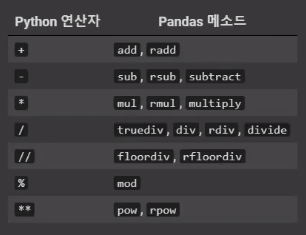

#### add()

In [127]:
a = np.random.randint(1, 10, size = (3, 3))
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [128]:
# 넘파이 각 요소들이 +해서 나옴
a +a[0]

array([[18,  6,  4],
       [14, 11,  9],
       [18, 12,  6]])

In [129]:
df = pd.DataFrame(a, columns = list('ABC'))
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [130]:
# 데이터프레임에서도 같은 결과
df + df.iloc[0]

,A,B,C
0,18,6,4
1,14,11,9
2,18,12,6


In [131]:
# 넘파이 기반이라서 함수도 혼욛되서 사용되기도 함
df.add(df.iloc[0])

,A,B,C
0,18,6,4
1,14,11,9
2,18,12,6


#### sub() / subtract()

In [132]:
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [133]:
a - a[0]

array([[ 0,  0,  0],
       [-4,  5,  5],
       [ 0,  6,  2]])

In [134]:
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [135]:
df - df.iloc[0]

,A,B,C
0,0,0,0
1,-4,5,5
2,0,6,2


In [136]:
df.sub(df.iloc[0])

,A,B,C
0,0,0,0
1,-4,5,5
2,0,6,2


In [137]:
# B를 기준으로 A,C가 빼지고 B는 본인을 빼서 0
df.subtract(df['B'], axis = 0)

,A,B,C
0,6,0,-1
1,-3,0,-1
2,0,0,-5


#### mul() / multply()




In [138]:
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [139]:
a * a[1]

array([[45, 24, 14],
       [25, 64, 49],
       [45, 72, 28]])

In [140]:
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [141]:
df * df.iloc[1]

,A,B,C
0,45,24,14
1,25,64,49
2,45,72,28


In [142]:
df.mul(df.iloc[1])

,A,B,C
0,45,24,14
1,25,64,49
2,45,72,28


In [143]:
df.multiply(df.iloc[1])

,A,B,C
0,45,24,14
1,25,64,49
2,45,72,28


#### truediv() /  div() / divide() / floordiv()

In [144]:
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [145]:
a /a[0]

array([[1.        , 1.        , 1.        ],
       [0.55555556, 2.66666667, 3.5       ],
       [1.        , 3.        , 2.        ]])

In [146]:
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [147]:
df /df.iloc[0]

,A,B,C
0,1.000000,1.000000,1.0
1,0.555556,2.666667,3.5
2,1.000000,3.000000,2.0


In [148]:
df.truediv(df.iloc[0])

,A,B,C
0,1.000000,1.000000,1.0
1,0.555556,2.666667,3.5
2,1.000000,3.000000,2.0


In [149]:
df.div(df.iloc[1])

,A,B,C
0,1.8,0.375,0.285714
1,1.0,1.000,1.000000
2,1.8,1.125,0.571429


In [150]:
df.divide(df.iloc[2])

,A,B,C
0,1.000000,0.333333,0.50
1,0.555556,0.888889,1.75
2,1.000000,1.000000,1.00


In [151]:
a // a[0]

array([[1, 1, 1],
       [0, 2, 3],
       [1, 3, 2]])

In [152]:
df.floordiv(df.iloc[0])

,A,B,C
0,1,1,1
1,0,2,3
2,1,3,2


#### mod()

In [153]:
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [154]:
a % a[0]

array([[0, 0, 0],
       [5, 2, 1],
       [0, 0, 0]])

In [155]:
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [156]:
df.mod(df.iloc[0])

,A,B,C
0,0,0,0
1,5,2,1
2,0,0,0


#### pow()

In [157]:
a

array([[9, 3, 2],
       [5, 8, 7],
       [9, 9, 4]])

In [158]:
a **a[0]

array([[387420489,        27,         4],
       [  1953125,       512,        49],
       [387420489,       729,        16]])

In [159]:
df

,A,B,C
0,9,3,2
1,5,8,7
2,9,9,4


In [160]:
df.pow(df.iloc[0])

,A,B,C
0,387420489,27,4
1,1953125,512,49
2,387420489,729,16


In [161]:
row = df.iloc[0, ::2]
row

A    9
C    2
Name: 0, dtype: int64

In [162]:
# row 지정해서 그것만 빼주기
df - row

,A,B,C
0,0.0,NaN,0.0
1,-4.0,NaN,5.0
2,0.0,NaN,2.0


### 정렬(Sort)

In [163]:
s = pd.Series(range(5), index = ['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [164]:
# 인덱스로 정리
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [165]:
# 값으로 정리
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [166]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                  index = [2, 4, 1, 3],
                  columns = list('BDAC'))
df


,B,D,A,C
2,2,7,1,0
4,6,2,4,7
1,1,7,2,5
3,0,4,2,1


In [167]:
df.sort_index()

,B,D,A,C
1,1,7,2,5
2,2,7,1,0
3,0,4,2,1
4,6,2,4,7


In [168]:
# 2차원이니깐 어디를 할지 지정해주어야함
# 지정안해주면 오류
# A columns이 정렬됨
df.sort_values(by = 'A')

,B,D,A,C
2,2,7,1,0
1,1,7,2,5
3,0,4,2,1
4,6,2,4,7


In [169]:
# 몇개도 지정 가능
df.sort_values(by = ['A', 'C'])

,B,D,A,C
2,2,7,1,0
3,0,4,2,1
1,1,7,2,5
4,6,2,4,7


In [170]:
# axis = 1로 열이 정렬됨
df.sort_index(axis = 1)

,A,B,C,D
2,1,2,0,7
4,4,6,7,2
1,2,1,5,7
3,2,0,1,4


### 순위(Ranking)


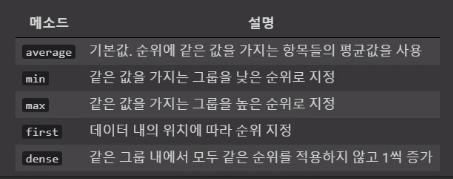

In [171]:
s = pd.Series([-2, 4, 7, 3, 0, 7, 5, -4, 2, 6])
s

0   -2
1    4
2    7
3    3
4    0
5    7
6    5
7   -4
8    2
9    6
dtype: int64

In [172]:
# 첫번째열은 인덱스, 두번째열은 제일 낮은 숫자부터의 순위 
s.rank()

0    2.0
1    6.0
2    9.5
3    5.0
4    3.0
5    9.5
6    7.0
7    1.0
8    4.0
9    8.0
dtype: float64

In [173]:
# method를 지정안해줬을 때는, 동일한 숫자가 .5로 되었음
# first는 동일한 숫자에서 먼저 나온 숫자에게 먼저 등수를 주기
s.rank(method = 'first')

0     2.0
1     6.0
2     9.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

In [174]:
# max는 같은 값을 가지는 그룹을 높은 순위로 지정
s.rank(method = 'max')

0     2.0
1     6.0
2    10.0
3     5.0
4     3.0
5    10.0
6     7.0
7     1.0
8     4.0
9     8.0
dtype: float64

### 고성능 연산

In [175]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(np.random.rand(nrows, ncols)) for i in range(4))


In [176]:
# 다 더하는 시간 측정
# %timeit : 시간 측정
%timeit df1 + df2 + df3 + df4

10 loops, best of 5: 62.5 ms per loop


In [177]:
# eval를 사용해서 시간이 좀 더 단축
%timeit pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 5: 41.5 ms per loop


In [178]:
%timeit df1 * -df2 / (-df3 * df4)

10 loops, best of 5: 93.9 ms per loop


In [179]:
# eval를 사용해서 시간이 좀 더 단축
%timeit pd.eval('df1 * -df2 / (-df3 * df4)')

10 loops, best of 5: 50.2 ms per loop


In [180]:
%timeit (df1 < df2) & (df2 <= df3) & (df3 != df4) 

10 loops, best of 5: 62.6 ms per loop


In [181]:
%timeit pd.eval('(df1 < df2) & (df2 <= df3) & (df3 != df4)')

10 loops, best of 5: 93.9 ms per loop


In [182]:
df = pd.DataFrame(np.random.rand(1000000, 5), columns = ['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.872279,0.360652,0.213192,0.841046,0.849861
1,0.643884,0.508240,0.783866,0.854940,0.902405
2,0.222911,0.663449,0.234401,0.372603,0.301533
3,0.717376,0.753640,0.207621,0.473101,0.805935
4,0.553698,0.563886,0.191758,0.900185,0.760201


In [183]:
%timeit df['A'] + df['B'] / df['C'] - df['D'] * df['E']

100 loops, best of 5: 16.9 ms per loop


In [184]:
%timeit pd.eval('df.A + df.B / df.C - df.D * df.E')

100 loops, best of 5: 8.26 ms per loop


In [185]:
# 위에는 지정해주었지만, 지정해주지않아서 찾는데 시간이 더 걸림
%timeit df.eval('A + B / C - D * E')

100 loops, best of 5: 13 ms per loop


In [186]:
# inplace = True를 통해서 R에 저장한 값이 추가됨
df.eval('R = A + B / C - D + E', inplace = True)
df.head()

,A,B,C,D,E,R
0,0.872279,0.360652,0.213192,0.841046,0.849861,2.572772
1,0.643884,0.508240,0.783866,0.854940,0.902405,1.339724
2,0.222911,0.663449,0.234401,0.372603,0.301533,2.982243
3,0.717376,0.753640,0.207621,0.473101,0.805935,4.680102
4,0.553698,0.563886,0.191758,0.900185,0.760201,3.354327


In [187]:
# 값을 바꾸고 싶다면, 값을 바꾸고 다시 실행하면 됨.
df.eval('R = A - B / C + D * E', inplace = True)
df.head()

,A,B,C,D,E,R
0,0.872279,0.360652,0.213192,0.841046,0.849861,-0.104627
1,0.643884,0.508240,0.783866,0.854940,0.902405,0.767009
2,0.222911,0.663449,0.234401,0.372603,0.301533,-2.495139
3,0.717376,0.753640,0.207621,0.473101,0.805935,-2.531228
4,0.553698,0.563886,0.191758,0.900185,0.760201,-1.702595


In [188]:
# mean(): 행 mean(1): 열
col_mean = df.mean(1)
df['A'] + col_mean

0         1.377679
1         1.387274
2         0.106204
3         0.788450
4         0.764886
            ...   
999995    1.178907
999996    0.481396
999997    1.300129
999998    1.481746
999999    1.556247
Length: 1000000, dtype: float64

In [189]:
# @(at)을 통해서 밖에 있는 변수를 들여올 수 있음
df.eval('A + @col_mean')

0         1.377679
1         1.387274
2         0.106204
3         0.788450
4         0.764886
            ...   
999995    1.178907
999996    0.481396
999997    1.300129
999998    1.481746
999999    1.556247
Length: 1000000, dtype: float64

In [190]:
df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]

,A,B,C,D,E,R
22,0.423029,0.327288,0.593774,0.467140,0.918787,0.301031
23,0.323787,0.470676,0.893657,0.735937,0.875375,0.441323
36,0.030576,0.439441,0.728213,0.343899,0.652258,-0.348565
38,0.175295,0.378400,0.509315,0.934145,0.802271,0.181773
49,0.408288,0.089677,0.532543,0.712540,0.184086,0.371062
...,...,...,...,...,...,...
999948,0.344020,0.041192,0.728959,0.860578,0.665010,0.859805
999953,0.494681,0.023060,0.664086,0.162219,0.127125,0.480579
999961,0.151376,0.466234,0.536011,0.898059,0.931232,0.117855
999967,0.190961,0.054168,0.653459,0.722457,0.037384,0.135075


In [191]:
pd.eval('df[(df.A < 0.5) & (df.B < 0.5) & (df.C > 0.5)]')

,A,B,C,D,E,R
22,0.423029,0.327288,0.593774,0.467140,0.918787,0.301031
23,0.323787,0.470676,0.893657,0.735937,0.875375,0.441323
36,0.030576,0.439441,0.728213,0.343899,0.652258,-0.348565
38,0.175295,0.378400,0.509315,0.934145,0.802271,0.181773
49,0.408288,0.089677,0.532543,0.712540,0.184086,0.371062
...,...,...,...,...,...,...
999948,0.344020,0.041192,0.728959,0.860578,0.665010,0.859805
999953,0.494681,0.023060,0.664086,0.162219,0.127125,0.480579
999961,0.151376,0.466234,0.536011,0.898059,0.931232,0.117855
999967,0.190961,0.054168,0.653459,0.722457,0.037384,0.135075


In [192]:
# 계산이 아닌 조건이 포함된 상태는 query()
df.query('(A < 0.5) and (B < 0.5) and (C > 0.5)')

,A,B,C,D,E,R
22,0.423029,0.327288,0.593774,0.467140,0.918787,0.301031
23,0.323787,0.470676,0.893657,0.735937,0.875375,0.441323
36,0.030576,0.439441,0.728213,0.343899,0.652258,-0.348565
38,0.175295,0.378400,0.509315,0.934145,0.802271,0.181773
49,0.408288,0.089677,0.532543,0.712540,0.184086,0.371062
...,...,...,...,...,...,...
999948,0.344020,0.041192,0.728959,0.860578,0.665010,0.859805
999953,0.494681,0.023060,0.664086,0.162219,0.127125,0.480579
999961,0.151376,0.466234,0.536011,0.898059,0.931232,0.117855
999967,0.190961,0.054168,0.653459,0.722457,0.037384,0.135075


In [193]:
col_mean = df['D'].mean()
print(col_mean)
df[(df.A < col_mean) & (df.B < col_mean)]

0.5001915524562259


,A,B,C,D,E,R
14,0.442901,0.451028,0.412033,0.578135,0.760167,-0.212258
20,0.163299,0.268884,0.416021,0.550730,0.926169,0.027045
22,0.423029,0.327288,0.593774,0.467140,0.918787,0.301031
23,0.323787,0.470676,0.893657,0.735937,0.875375,0.441323
26,0.497268,0.256593,0.270877,0.650540,0.919629,0.148256
...,...,...,...,...,...,...
999968,0.277469,0.156946,0.311516,0.626906,0.602473,0.151349
999976,0.294064,0.123356,0.183496,0.850071,0.596295,0.128701
999983,0.489843,0.295728,0.363713,0.332717,0.792409,-0.059591
999984,0.100285,0.425413,0.926584,0.007942,0.508518,-0.354796


In [194]:
df.query('A < @col_mean and B < @col_mean')

,A,B,C,D,E,R
14,0.442901,0.451028,0.412033,0.578135,0.760167,-0.212258
20,0.163299,0.268884,0.416021,0.550730,0.926169,0.027045
22,0.423029,0.327288,0.593774,0.467140,0.918787,0.301031
23,0.323787,0.470676,0.893657,0.735937,0.875375,0.441323
26,0.497268,0.256593,0.270877,0.650540,0.919629,0.148256
...,...,...,...,...,...,...
999968,0.277469,0.156946,0.311516,0.626906,0.602473,0.151349
999976,0.294064,0.123356,0.183496,0.850071,0.596295,0.128701
999983,0.489843,0.295728,0.363713,0.332717,0.792409,-0.059591
999984,0.100285,0.425413,0.926584,0.007942,0.508518,-0.354796


## 데이터 결합

### Concat() / Append()

In [195]:
# concat()으로 합치기
s1 = pd.Series(['a', 'b'], index = [1, 2])
s2 = pd.Series(['c', 'd'], index = [3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [196]:
# 데이터프레임을 만드는 함수
def create_df(cols, idx):
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [197]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [198]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [199]:
# 밑에 붙음
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [200]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [201]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [202]:
# columns은 다르지만 결합이 되고 누락값으로 처리됨
pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [203]:
# 충돌되는 부분이 있어서 오류가 뜨게 만듬
# verify_integrity= True 충돌되면 오류뜨게
pd.concat([df1, df3], verify_integrity= True)

ValueError: ignored

In [204]:
# ignore_index = True 충돌되는 부분이 있어도 무시하고 진행
pd.concat([df1, df3], ignore_index = True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [205]:
# 멀티인덱스 구조처럼 앞의 X,Y가 추가됨
pd.concat([df1, df3], keys = ['X', 'Y'])

A   B
X 1  a1  b1
  2  a2  b2
Y 0  a0  b0
  1  a1  b1

In [206]:
# 중복이 안되는 값은 NaN
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [207]:
# 둘 다 존재하는 데이터에 한해서만 join
pd.concat([df5, df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [208]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [209]:
# 축을 지정해서 가능
pd.concat([df3, df4], axis = 1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [210]:
# 축을 지정하지않으면 자동으로 axis = 0
pd.concat([df1, df3])

,A,B
1,a1,b1
2,a2,b2
0,a0,b0
1,a1,b1


### 병합과 조인

In [211]:
df1 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '학과' : ['경영학과', '교육학과', '컴퓨터학과', '통계학과']})
df1

,학생,학과
0,홍길동,경영학과
1,이순신,교육학과
2,임꺽정,컴퓨터학과
3,김유신,통계학과


In [212]:
df2 = pd.DataFrame({'학생' : ['홍길동', '이순신', '임꺽정', '김유신'],
                   '입학년도' : [2012, 2016, 2019, 2020]})
df2

,학생,입학년도
0,홍길동,2012
1,이순신,2016
2,임꺽정,2019
3,김유신,2020


In [213]:
df3 = pd.merge(df1, df2)
df3

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [214]:
df4 = pd.DataFrame({'학과' : ['경영학과', '교육학과', '컴퓨터학과', '통계학과'],
                    '학과장' : ['황희', '장영실', '안창호', '정약용']})
df4

,학과,학과장
0,경영학과,황희
1,교육학과,장영실
2,컴퓨터학과,안창호
3,통계학과,정약용


In [215]:
pd.merge(df3, df4)

,학생,학과,입학년도,학과장
0,홍길동,경영학과,2012,황희
1,이순신,교육학과,2016,장영실
2,임꺽정,컴퓨터학과,2019,안창호
3,김유신,통계학과,2020,정약용


In [216]:
df5 = pd.DataFrame({'학과' : ['경영학과', '교육학과', '교육학과', '컴퓨터학과', '컴퓨터학과', '통계학과'],
                    '과목' : ['경영개론', '기초수학', '물리학', '프로그래밍', '운영체제', '확률론']})
df5

,학과,과목
0,경영학과,경영개론
1,교육학과,기초수학
2,교육학과,물리학
3,컴퓨터학과,프로그래밍
4,컴퓨터학과,운영체제
5,통계학과,확률론


In [217]:
# 학과를 기준으로 만들어서 학생이 중복됨
pd.merge(df1, df5)

,학생,학과,과목
0,홍길동,경영학과,경영개론
1,이순신,교육학과,기초수학
2,이순신,교육학과,물리학
3,임꺽정,컴퓨터학과,프로그래밍
4,임꺽정,컴퓨터학과,운영체제
5,김유신,통계학과,확률론


In [218]:
# on을 기준으로 합침
pd.merge(df1, df2, on='학생')

,학생,학과,입학년도
0,홍길동,경영학과,2012
1,이순신,교육학과,2016
2,임꺽정,컴퓨터학과,2019
3,김유신,통계학과,2020


In [219]:
df6 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '성적' : ['A', 'A+', 'B', 'C']})
df6

,이름,성적
0,홍길동,A
1,이순신,A+
2,임꺽정,B
3,김유신,C


In [220]:
pd.merge(df1, df6, left_on = '학생', right_on = '이름')

,학생,학과,이름,성적
0,홍길동,경영학과,홍길동,A
1,이순신,교육학과,이순신,A+
2,임꺽정,컴퓨터학과,임꺽정,B
3,김유신,통계학과,김유신,C


In [221]:
# drop을 사용해서 이름의 열만 제외되도록 함
pd.merge(df1, df6, left_on = '학생', right_on = '이름').drop('이름', axis = 1)

,학생,학과,성적
0,홍길동,경영학과,A
1,이순신,교육학과,A+
2,임꺽정,컴퓨터학과,B
3,김유신,통계학과,C


In [222]:
mdf1 = df1.set_index('학생')
mdf2 = df2.set_index('학생')

In [223]:
mdf1

,학과
학생,
홍길동,경영학과
이순신,교육학과
임꺽정,컴퓨터학과
김유신,통계학과


In [224]:
mdf2

,입학년도
학생,
홍길동,2012
이순신,2016
임꺽정,2019
김유신,2020


In [225]:
pd.merge(mdf1, mdf2, left_index = True, right_index = True)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [226]:
# 위와 같은 값
mdf1.join(mdf2)

,학과,입학년도
학생,,
홍길동,경영학과,2012
이순신,교육학과,2016
임꺽정,컴퓨터학과,2019
김유신,통계학과,2020


In [227]:
pd.merge(mdf1, df6, left_index = True, right_on = '이름')

,학과,이름,성적
0,경영학과,홍길동,A
1,교육학과,이순신,A+
2,컴퓨터학과,임꺽정,B
3,통계학과,김유신,C


In [228]:
df7 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정'],
                    '주문음식' : ['햄버거', '피자', '짜장면']})
df7

,이름,주문음식
0,홍길동,햄버거
1,이순신,피자
2,임꺽정,짜장면


In [229]:
df8 = pd.DataFrame({'이름' : ['홍길동', '이순신', '김유신'],
                    '주문음료' : ['콜라', '사이다', '커피']})
df8

,이름,주문음료
0,홍길동,콜라
1,이순신,사이다
2,김유신,커피


In [230]:
# 누락은 무시
pd.merge(df7, df8)

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [231]:
# inner join
pd.merge(df7, df8, how = 'inner')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다


In [232]:
# outer join
pd.merge(df7, df8, how = 'outer')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN
3,김유신,NaN,커피


In [233]:
# 왼쪽에 df7을 기준
pd.merge(df7, df8, how = 'left')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,임꺽정,짜장면,NaN


In [234]:
# 오른쪽에 df8을 기준
pd.merge(df7, df8, how = 'right')

,이름,주문음식,주문음료
0,홍길동,햄버거,콜라
1,이순신,피자,사이다
2,김유신,NaN,커피


In [235]:
df9 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정', '김유신'],
                   '순위' : [3, 2, 4, 1]})
df9

,이름,순위
0,홍길동,3
1,이순신,2
2,임꺽정,4
3,김유신,1


In [236]:
df10 = pd.DataFrame({'이름' : ['홍길동', '이순신', '임꺽정', '김유신'],
                    '순위' : [4, 1, 3, 2]})
df10

,이름,순위
0,홍길동,4
1,이순신,1
2,임꺽정,3
3,김유신,2


In [237]:
# 이름을 기준으로 했는데 둘이 순위라는 이름이 겹쳐서 새로운 이름으로 해줌
pd.merge(df9, df10, on = '이름')

,이름,순위_x,순위_y
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


In [238]:
# suffixes를 통해서 겹치는 부분의 이름을 정해줄 수도 있음
pd.merge(df9, df10, on = '이름', suffixes = ['_인기', '_성적'])

,이름,순위_인기,순위_성적
0,홍길동,3,4
1,이순신,2,1
2,임꺽정,4,3
3,김유신,1,2


## 데이터 집계와 그룹 연산

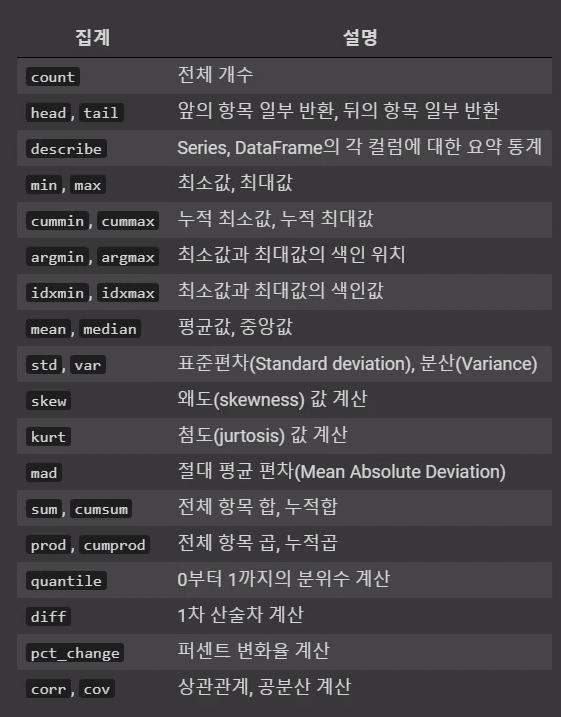

#### 집계 연산(Aggregation)


In [239]:
df = pd.DataFrame([[1,1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, -4.1]],
                  index = [1, 2, 3, 4],
                  columns = ['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [240]:
# 앞부분 2개 head
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [241]:
# 뒷부분 2개 tail
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [242]:
# 전체의 모든 계산값을 한번에 요약 통계
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [243]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [244]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [245]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [246]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [247]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [248]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [249]:
# NaN은 계산이 불가함
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [250]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [251]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [252]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [253]:
# B값에 대해서 corr상태보기
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [254]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [255]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [256]:
df['A'].value_counts()

0.44    1
2.40    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [257]:
df = pd.DataFrame({'c1': ['a', 'a', 'b', 'b', 'c', 'd', 'b'],
                   'c2' : ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3' : np.random.randint(7),
                   'c4' : np.random.rand(7)})
df

,c1,c2,c3,c4
0,a,A,1,0.505010
1,a,B,1,0.401280
2,b,B,1,0.645034
3,b,A,1,0.030336
4,c,D,1,0.542779
5,d,C,1,0.258147
6,b,C,1,0.373045


In [258]:
# c1은 리스트로 넣어서 object
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [259]:
# c3를 groupby하는데 c1을 기준으로 mean값을 계산
df['c3'].groupby(df['c1']).mean()

c1
a    1
b    1
c    1
d    1
Name: c3, dtype: int64

In [260]:
df['c4'].groupby(df['c2']).std()

c2
A    0.335645
B    0.172360
C    0.081245
D         NaN
Name: c4, dtype: float64

In [261]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.505010
    B     0.401280
b   A     0.030336
    B     0.645034
    C     0.373045
c   D     0.542779
d   C     0.258147
Name: c4, dtype: float64

In [262]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.505010,0.401280,NaN,NaN
b,0.030336,0.645034,0.373045,NaN
c,NaN,NaN,NaN,0.542779
d,NaN,NaN,0.258147,NaN


In [263]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,1,0.453145
b,1,0.349471
c,1,0.542779
d,1,0.258147


In [264]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2              
a  A    1  0.505010
   B    1  0.401280
b  A    1  0.030336
   B    1  0.645034
   C    1  0.373045
c  D    1  0.542779
d  C    1  0.258147

In [265]:
df.groupby(['c1', 'c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [266]:
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3       c4
0  a  A   1  0.50501
1  a  B   1  0.40128
b
  c1 c2  c3        c4
2  b  B   1  0.645034
3  b  A   1  0.030336
6  b  C   1  0.373045
c
  c1 c2  c3        c4
4  c  D   1  0.542779
d
  c1 c2  c3        c4
5  d  C   1  0.258147


In [267]:
# c1, c2 같이 groupby
for (c1, c2), group in df.groupby(['c1', 'c2']):
  print((c1, c2))
  print(group)

('a', 'A')
  c1 c2  c3       c4
0  a  A   1  0.50501
('a', 'B')
  c1 c2  c3       c4
1  a  B   1  0.40128
('b', 'A')
  c1 c2  c3        c4
3  b  A   1  0.030336
('b', 'B')
  c1 c2  c3        c4
2  b  B   1  0.645034
('b', 'C')
  c1 c2  c3        c4
6  b  C   1  0.373045
('c', 'D')
  c1 c2  c3        c4
4  c  D   1  0.542779
('d', 'C')
  c1 c2  c3        c4
5  d  C   1  0.258147


In [268]:
# c1과 c2에 대해서 기준을 하고 c4에 대한 mean값만 보기
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.505010
   B   0.401280
b  A   0.030336
   B   0.645034
   C   0.373045
c  D   0.542779
d  C   0.258147

In [269]:
df.groupby('c1')['c3'].quantile()

c1
a    1.0
b    1.0
c    1.0
d    1.0
Name: c3, dtype: float64

In [270]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [271]:
df.groupby('c1')['c4'].median()

c1
a    0.453145
b    0.373045
c    0.542779
d    0.258147
Name: c4, dtype: float64

In [272]:
df.groupby('c1')['c4'].std()

c1
a    0.073348
b    0.308026
c         NaN
d         NaN
Name: c4, dtype: float64

In [273]:
# agg로 합쳐서 구하기
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean       min       max
c1 c2                              
a  A   0.505010  0.505010  0.505010
   B   0.401280  0.401280  0.401280
b  A   0.030336  0.030336  0.030336
   B   0.645034  0.645034  0.645034
   C   0.373045  0.373045  0.373045
c  D   0.542779  0.542779  0.542779
d  C   0.258147  0.258147  0.258147

In [274]:
# as_index = False 인덱스가 사라지고 하나의 컬럼으로 나옴
df.groupby(['c1', 'c2'], as_index = False)['c4'].mean()

,c1,c2,c4
0,a,A,0.505010
1,a,B,0.401280
2,b,A,0.030336
3,b,B,0.645034
4,b,C,0.373045
5,c,D,0.542779
6,d,C,0.258147


In [275]:
# 그룹으로 지정되는게 사라짐
df.groupby(['c1', 'c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     0.505010
    B     0.401280
b   A     0.030336
    B     0.645034
    C     0.373045
c   D     0.542779
d   C     0.258147
Name: c4, dtype: float64

In [276]:
# c1의 top5
def top(df, n=3, columns = 'c1'):
  return df.sort_values(by = columns)[-n:]
top(df, n=5)

,c1,c2,c3,c4
2,b,B,1,0.645034
3,b,A,1,0.030336
6,b,C,1,0.373045
4,c,D,1,0.542779
5,d,C,1,0.258147


In [277]:
# 만들어놓은 함수를 groupby의 직계함수로 사용할 수 있음
df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   1  0.505010
   1  a  B   1  0.401280
b  2  b  B   1  0.645034
   3  b  A   1  0.030336
   6  b  C   1  0.373045
c  4  c  D   1  0.542779
d  5  d  C   1  0.258147

### 피벗 테이블(Pivot Table)


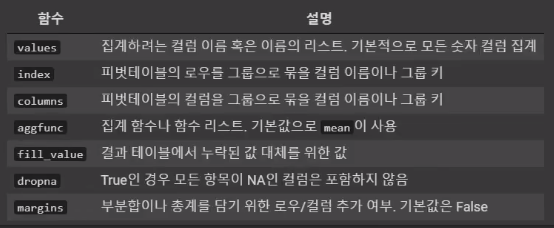

In [278]:
# c3, c4에 대해서 c1이 인덱스로 c2가 컬럼으로 피벗테이블 만듬
df.pivot_table(['c3', 'c4'],
               index = ['c1'],
                columns = ['c2'])


c3                       c4                              
c2    A    B    C    D         A         B         C         D
c1                                                            
a   1.0  1.0  NaN  NaN  0.505010  0.401280       NaN       NaN
b   1.0  1.0  1.0  NaN  0.030336  0.645034  0.373045       NaN
c   NaN  NaN  NaN  1.0       NaN       NaN       NaN  0.542779
d   NaN  NaN  1.0  NaN       NaN       NaN  0.258147       NaN

In [279]:
# margins는 부분합이나 총계를 담을 수 있는 피벗테이블에 all이 추가되었음
df.pivot_table(['c3', 'c4'],
               index = ['c1'],
                columns = ['c2'],
               margins = True)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    1.0  1.0  NaN  NaN   1  0.505010  0.401280       NaN       NaN  0.453145
b    1.0  1.0  1.0  NaN   1  0.030336  0.645034  0.373045       NaN  0.349471
c    NaN  NaN  NaN  1.0   1       NaN       NaN       NaN  0.542779  0.542779
d    NaN  NaN  1.0  NaN   1       NaN       NaN  0.258147       NaN  0.258147
All  1.0  1.0  1.0  1.0   1  0.267673  0.523157  0.315596  0.542779  0.393662

In [280]:
# agfunc으로 sum을 줘서 all에 합계들이 표시됨
df.pivot_table(['c3', 'c4'],
               index = ['c1'],
                columns = ['c2'],
               margins = True,
               aggfunc = sum)

c3                           c4                                        
c2     A    B    C    D All         A         B         C         D       All
c1                                                                           
a    1.0  1.0  NaN  NaN   2  0.505010  0.401280       NaN       NaN  0.906290
b    1.0  1.0  1.0  NaN   3  0.030336  0.645034  0.373045       NaN  1.048414
c    NaN  NaN  NaN  1.0   1       NaN       NaN       NaN  0.542779  0.542779
d    NaN  NaN  1.0  NaN   1       NaN       NaN  0.258147       NaN  0.258147
All  2.0  2.0  2.0  1.0   7  0.535345  1.046314  0.631192  0.542779  2.755631

In [281]:
# fill_value의 값을 줘서 누락값을 채우기
df.pivot_table(['c3', 'c4'],
               index = ['c1'],
                columns = ['c2'],
               margins = True,
               aggfunc = sum,
               fill_value = 0)

c3                     c4                                        
c2   A  B  C  D All         A         B         C         D       All
c1                                                                   
a    1  1  0  0   2  0.505010  0.401280  0.000000  0.000000  0.906290
b    1  1  1  0   3  0.030336  0.645034  0.373045  0.000000  1.048414
c    0  0  0  1   1  0.000000  0.000000  0.000000  0.542779  0.542779
d    0  0  1  0   1  0.000000  0.000000  0.258147  0.000000  0.258147
All  2  2  2  1   7  0.535345  1.046314  0.631192  0.542779  2.755631

In [282]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [283]:
pd.crosstab(df.c1, df.c2, values= df.c3, aggfunc = sum, margins = True)

c2,A,B,C,D,All
c1,,,,,
a,1.0,1.0,NaN,NaN,2
b,1.0,1.0,1.0,NaN,3
c,NaN,NaN,NaN,1.0,1
d,NaN,NaN,1.0,NaN,1
All,2.0,2.0,2.0,1.0,7


### 범주형(Categorical) 데이터


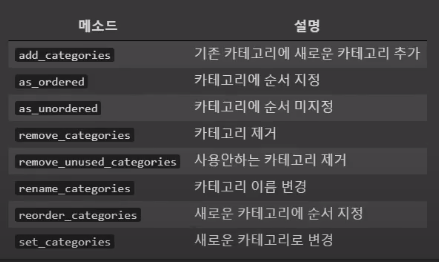

In [284]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [285]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [286]:
pd.value_counts(s)

c1    6
c2    4
dtype: int64

In [287]:
code = pd.Series([0, 1, 0, 1, 0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [288]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [289]:
# c1과 c2를 붙여서 code로 범주형을 나타냄
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [290]:
df = pd.DataFrame({'id': np.arange(len(s)),
                   'c' : s,
                   'v' : np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,3583
1,1,c2,4034
2,2,c1,2645
3,3,c2,3790
4,4,c1,3871
5,5,c1,1199
6,6,c2,2751
7,7,c1,2366
8,8,c2,3427
9,9,c1,4896


In [291]:
# 데이터프레임의 c라는 컬럼을 카테고리 변경
c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [292]:
c.values

['c1', 'c2', 'c1', 'c2', 'c1', 'c1', 'c2', 'c1', 'c2', 'c1']
Categories (2, object): ['c1', 'c2']

In [293]:
# c1과 c2가 들어있음을 확인
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [294]:
# c1, c2가 code로 어떤건지 확인
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [295]:
# 타입을 category로 변경한 것을 데이터프레임 c칼럼에 적용
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [296]:
# Categorical로 카테고리를 지정할 수 있음
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [297]:
catagories = ['c1', 'c2', 'c3']
codes = [0, 1, 2, 0, 1]
c = pd.Categorical.from_codes(codes, catagories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [298]:
# 순서들이 반영됨을 확인할 수 있음
pd.Categorical.from_codes(codes, catagories, ordered  = True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [299]:
# as_orderd로도 순서 반영 가능
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [300]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [301]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [302]:
# set_categories를 통해서 추가 가능
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [303]:
# 카테고리에 추가됨을 확인
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [304]:
# c1과 c3가 있는 부분 출력
c[c.isin(['c1', 'c3'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [305]:
# 안쓰는거 제거
c = c.remove_unused_categories()

In [306]:
# 제거 확인
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 문자열 연산

파이썬의 문자열 연산자를 거의 모두 반영한다.

#### 문자열 연산자

In [307]:
name_tuple = ['Swan Lee', 'Steven Jobs', 'Larry Page', 'Elon Mask', None, 'Bill Gates', 'Makr Zuckerberg', 'Jeff Bezos']
names = pd.Series(name_tuple)
names

0           Swan Lee
1        Steven Jobs
2         Larry Page
3          Elon Mask
4               None
5         Bill Gates
6    Makr Zuckerberg
7         Jeff Bezos
dtype: object

In [308]:
# 문자열 접근을 위해서 str
names.str.lower()

0           swan lee
1        steven jobs
2         larry page
3          elon mask
4               None
5         bill gates
6    makr zuckerberg
7         jeff bezos
dtype: object

In [309]:
# 문자열의 길이 구하기
names.str.len()

0     8.0
1    11.0
2    10.0
3     9.0
4     NaN
5    10.0
6    15.0
7    10.0
dtype: float64

In [310]:
# 문자열에 관해서 스페이스로 나눠짐
names.str.split()

0           [Swan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Mask]
4                  None
5         [Bill, Gates]
6    [Makr, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

#### 기타 연산자


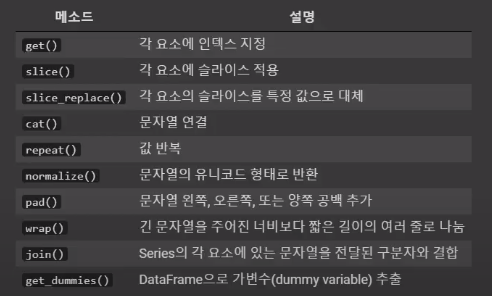

In [311]:
names.str[0:4]

0    Swan
1    Stev
2    Larr
3    Elon
4    None
5    Bill
6    Makr
7    Jeff
dtype: object

In [312]:
# 이름의 성만 가져오기
names.str.split().str.get(-1)

0           Lee
1          Jobs
2          Page
3          Mask
4          None
5         Gates
6    Zuckerberg
7         Bezos
dtype: object

In [313]:
# 이름을 반복해줌
names.str.repeat(2)

0                  Swan LeeSwan Lee
1            Steven JobsSteven Jobs
2              Larry PageLarry Page
3                Elon MaskElon Mask
4                              None
5              Bill GatesBill Gates
6    Makr ZuckerbergMakr Zuckerberg
7              Jeff BezosJeff Bezos
dtype: object

In [314]:
# 문자열 사이마다 *이 들어감
names.str.join('*')

0                  S*w*a*n* *L*e*e
1            S*t*e*v*e*n* *J*o*b*s
2              L*a*r*r*y* *P*a*g*e
3                E*l*o*n* *M*a*s*k
4                             None
5              B*i*l*l* *G*a*t*e*s
6    M*a*k*r* *Z*u*c*k*e*r*b*e*r*g
7              J*e*f*f* *B*e*z*o*s
dtype: object

#### 정규표현식


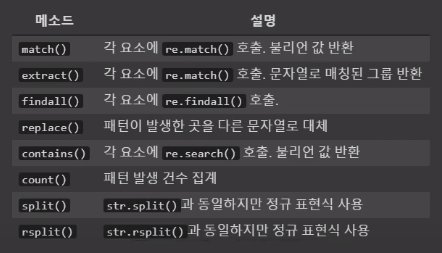

In [315]:
# 전체가 다 알파벳인거는 true, None값이 중간에 있어서 None이 나옴
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    True
4    None
5    True
6    True
7    True
dtype: object

In [316]:
# 정규표현식에 해당하는 것을 다 찾아줌
names.str.findall('([A-Za-z]+)')

0           [Swan, Lee]
1        [Steven, Jobs]
2         [Larry, Page]
3          [Elon, Mask]
4                  None
5         [Bill, Gates]
6    [Makr, Zuckerberg]
7         [Jeff, Bezos]
dtype: object

## 시계열 처리

은행이나 금융권에서 사용하는 데이터들이 시계열 데이터

In [317]:
idx = pd.DatetimeIndex(['2019-01-01', '2020-01-01', '2020-02-01', '2020-02-02', '2020-03-01'])
s = pd.Series([0, 1, 2, 3, 4], index = idx)
s

2019-01-01    0
2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [318]:
# 2020-01-01 이후를 조회
s['2020-01-01':]

2020-01-01    1
2020-02-01    2
2020-02-02    3
2020-03-01    4
dtype: int64

In [319]:
# 2020-01-01 전을 조회
s[:'2020-01-01']

2019-01-01    0
2020-01-01    1
dtype: int64

In [320]:
# 날짜로 이루어져있어서 2019년만 보여달라고 할 수 있음
s['2019']

2019-01-01    0
dtype: int64

#### 시계열 데이터 구조


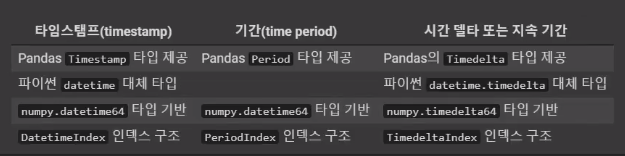

In [321]:
from datetime import datetime
# datetime 인덱스로 저장(타임스탬프)
dates = pd.to_datetime(['12-12-2019', datetime(2020, 1, 1), '2nd of Feb, 2020', '2020-Mar-4', '20200701'])
dates

DatetimeIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
               '2020-07-01'],
              dtype='datetime64[ns]', freq=None)

In [322]:
# period 인덱스로 저장(기간)
dates.to_period('D')

PeriodIndex(['2019-12-12', '2020-01-01', '2020-02-02', '2020-03-04',
             '2020-07-01'],
            dtype='period[D]', freq='D')

In [323]:
# 날짜들을 빼서 기간들을 알 수 있음
dates - dates[0]

TimedeltaIndex(['0 days', '20 days', '52 days', '83 days', '202 days'], dtype='timedelta64[ns]', freq=None)

In [324]:
# 전체를 D단위로 range를 계산해줌
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [325]:
# 7로 지정해서 2020-01-01부터 2020-01-07까지 나옴
pd.date_range('2020-01-01', periods = 7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [326]:
# fred = 'M'으로 지정해서 달마다로 7월까지 나옴
pd.date_range('2020-01-01', periods = 7, freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [327]:
# H는 시간 단위로 출력
pd.date_range('2020-01-01', periods = 7, freq = 'H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [328]:
# None을 줘서 아무것도 없는 값을 주면 NaT(Not a Time)이 나옴
idx = pd.to_datetime(['2020-01-01 12:00:00', '2020-01-02 00:00:00'] + [None])
idx

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [329]:
idx[2]

NaT

In [330]:
# 어디가 null인지를 확인하는데 null이 위치한 곳만 True
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

In [331]:
dates = [datetime(2020, 1, 1), datetime(2020, 1, 2), datetime(2020, 1, 4), datetime(2020, 1, 7),
         datetime(2020, 1, 10), datetime(2020, 1, 11), datetime(2020, 1, 15)]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 4, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0),
 datetime.datetime(2020, 1, 10, 0, 0),
 datetime.datetime(2020, 1, 11, 0, 0),
 datetime.datetime(2020, 1, 15, 0, 0)]

In [332]:
ts = pd.Series(np.random.rand(7), index = dates)
ts

2020-01-01    0.283439
2020-01-02    0.047476
2020-01-04    0.487457
2020-01-07    0.177516
2020-01-10    0.684904
2020-01-11    0.971117
2020-01-15    0.596251
dtype: float64

In [333]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-04', '2020-01-07',
               '2020-01-10', '2020-01-11', '2020-01-15'],
              dtype='datetime64[ns]', freq=None)

In [334]:
# 타임스탬프 객체로 출력
ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [335]:
# 인덱스로 접근
ts[ts.index[2]]

0.4874568977388596

In [336]:
# 인덱스로 접근
ts['20200104']

0.4874568977388596

In [337]:
ts['1/4/2020']

0.4874568977388596

In [338]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range('2017-10-01', periods = 1000))
ts

2017-10-01   -0.446323
2017-10-02   -0.416887
2017-10-03    0.218279
2017-10-04    1.546432
2017-10-05    0.693512
                ...   
2020-06-22    0.757945
2020-06-23   -0.175585
2020-06-24   -0.341122
2020-06-25    0.968332
2020-06-26    1.345857
Freq: D, Length: 1000, dtype: float64

In [339]:
# 년별로 인덱싱
ts['2020']

2020-01-01    0.495258
2020-01-02    0.094166
2020-01-03    1.819868
2020-01-04    0.372094
2020-01-05   -2.009242
                ...   
2020-06-22    0.757945
2020-06-23   -0.175585
2020-06-24   -0.341122
2020-06-25    0.968332
2020-06-26    1.345857
Freq: D, Length: 178, dtype: float64

In [340]:
# 월별로 인덱싱
ts['2020-06']

2020-06-01    0.370833
2020-06-02    0.464499
2020-06-03    0.925757
2020-06-04    0.415247
2020-06-05    0.511218
2020-06-06   -0.378723
2020-06-07    2.572581
2020-06-08    1.029743
2020-06-09    0.360927
2020-06-10   -0.732676
2020-06-11    1.519332
2020-06-12    0.001913
2020-06-13    0.450066
2020-06-14   -0.252108
2020-06-15   -2.249212
2020-06-16    0.230953
2020-06-17   -0.309448
2020-06-18    1.046756
2020-06-19   -1.266085
2020-06-20   -1.459662
2020-06-21   -1.107672
2020-06-22    0.757945
2020-06-23   -0.175585
2020-06-24   -0.341122
2020-06-25    0.968332
2020-06-26    1.345857
Freq: D, dtype: float64

In [341]:
ts[datetime(2020, 6, 20):]

2020-06-20   -1.459662
2020-06-21   -1.107672
2020-06-22    0.757945
2020-06-23   -0.175585
2020-06-24   -0.341122
2020-06-25    0.968332
2020-06-26    1.345857
Freq: D, dtype: float64

In [342]:
ts['2020-06-10': '2020-06-20']

2020-06-10   -0.732676
2020-06-11    1.519332
2020-06-12    0.001913
2020-06-13    0.450066
2020-06-14   -0.252108
2020-06-15   -2.249212
2020-06-16    0.230953
2020-06-17   -0.309448
2020-06-18    1.046756
2020-06-19   -1.266085
2020-06-20   -1.459662
Freq: D, dtype: float64

In [343]:
tdf = pd.DataFrame(np.random.randn(1000, 4),
                   index = pd.date_range('2017-10-01', periods = 1000),
                   columns = ['A', 'B', 'C', 'D'])
tdf

,A,B,C,D
2017-10-01,0.788383,1.973441,-0.900696,0.053835
2017-10-02,0.388905,0.339688,-0.850290,0.059879
2017-10-03,-2.241246,0.094659,1.522732,0.191528
2017-10-04,-0.310422,-1.828262,-0.500562,-0.044758
2017-10-05,0.027922,-0.804398,0.091005,-0.695460
...,...,...,...,...
2020-06-22,-1.475082,-2.696568,-0.483600,-0.437604
2020-06-23,0.153961,-1.936013,0.561702,0.917623
2020-06-24,-1.095125,0.240719,0.167867,-0.111299
2020-06-25,0.210146,0.531561,0.880694,-0.171149


In [344]:
tdf['2020']

,A,B,C,D
2020-01-01,1.587626,-0.243104,0.492565,0.063616
2020-01-02,0.243423,0.536150,0.960667,0.530243
2020-01-03,-0.786289,-1.044979,-0.822176,-1.425945
2020-01-04,0.464971,0.413721,-0.086334,1.925852
2020-01-05,-0.337713,-1.994026,0.396127,1.498458
...,...,...,...,...
2020-06-22,-1.475082,-2.696568,-0.483600,-0.437604
2020-06-23,0.153961,-1.936013,0.561702,0.917623
2020-06-24,-1.095125,0.240719,0.167867,-0.111299
2020-06-25,0.210146,0.531561,0.880694,-0.171149


In [345]:
tdf.loc['2020-06']

,A,B,C,D
2020-06-01,-1.573640,0.964002,-0.782756,-1.186238
2020-06-02,1.303286,-2.075450,1.301927,0.809931
2020-06-03,0.593338,-1.142283,-1.182157,-1.060261
2020-06-04,0.290160,-0.386144,-0.808685,-0.104331
2020-06-05,-1.562136,0.458031,-0.154699,-0.395383
2020-06-06,0.978568,1.639222,-1.698134,-1.875175
2020-06-07,-0.267194,1.665253,-0.001758,-0.471254
2020-06-08,-1.061217,-0.829144,-1.210292,0.042249
2020-06-09,0.084633,-0.951909,-0.482922,1.118843
2020-06-10,1.520957,-0.436377,0.108039,0.383466


In [346]:
# 2020-06-20이상
tdf['2020-06-20':]

,A,B,C,D
2020-06-20,0.395180,0.505294,-0.748207,-0.541075
2020-06-21,1.056536,1.233942,-0.465489,0.396656
2020-06-22,-1.475082,-2.696568,-0.483600,-0.437604
2020-06-23,0.153961,-1.936013,0.561702,0.917623
2020-06-24,-1.095125,0.240719,0.167867,-0.111299
2020-06-25,0.210146,0.531561,0.880694,-0.171149
2020-06-26,-0.861551,-0.583574,1.065404,0.546052


In [347]:
# C컬럼만 보기
tdf['C']

2017-10-01   -0.900696
2017-10-02   -0.850290
2017-10-03    1.522732
2017-10-04   -0.500562
2017-10-05    0.091005
                ...   
2020-06-22   -0.483600
2020-06-23    0.561702
2020-06-24    0.167867
2020-06-25    0.880694
2020-06-26    1.065404
Freq: D, Name: C, Length: 1000, dtype: float64

In [348]:
ts = pd.Series(np.random.randn(10),
               index = pd.DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-03', 
                                         '2020-01-04', '2020-01-05', '2020-01-05', '2020-01-06', '2020-01-07']))
ts

2020-01-01    0.194537
2020-01-01   -0.580040
2020-01-02    1.113844
2020-01-02   -1.999442
2020-01-03   -1.092663
2020-01-04   -0.083129
2020-01-05    0.281917
2020-01-05   -0.909260
2020-01-06    0.608727
2020-01-07    0.304278
dtype: float64

In [349]:
# 날짜가 중복된게 있어서 False
ts.index.is_unique

False

In [350]:
ts['2020-01-01']

2020-01-01    0.194537
2020-01-01   -0.580040
dtype: float64

In [351]:
# 날짜가 동일한 것들을 집계로
ts.groupby(level = 0).mean()

2020-01-01   -0.192752
2020-01-02   -0.442799
2020-01-03   -1.092663
2020-01-04   -0.083129
2020-01-05   -0.313671
2020-01-06    0.608727
2020-01-07    0.304278
dtype: float64

In [352]:
pd.date_range('2020-01-01', '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [353]:
# start를 통해 처음을 지정해주고 period로 range지정
pd.date_range(start = '2020-01-01', periods = 10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [354]:
# end를 통해 마지막을 지정하고 period만큼 앞을 출력
pd.date_range(end = '2020-07-01', periods = 10)

DatetimeIndex(['2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', freq='D')

In [355]:
# freq = 'B' B = Business라는 의미로 영업일만을 나타냄
pd.date_range('2020-07-01', '2020-07-7', freq = 'B')

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06',
               '2020-07-07'],
              dtype='datetime64[ns]', freq='B')

### 주기와 오프셋


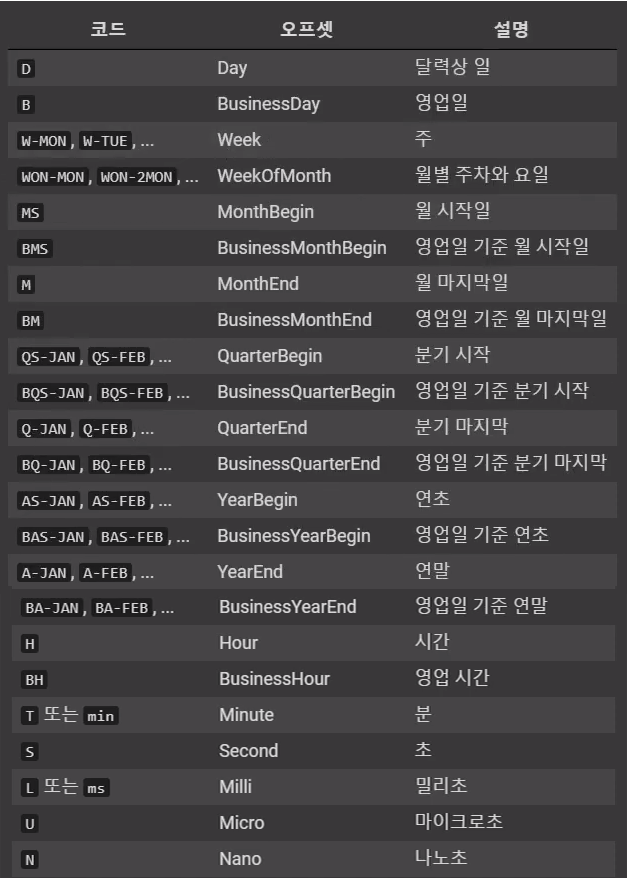

In [356]:
# H는 시간
pd.timedelta_range(0, periods = 12, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [357]:
# T는 분
pd.timedelta_range(0, periods = 60, freq = 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [358]:
# 1시간 30분마다의 인덱싱 결과
pd.timedelta_range(0, periods = 10, freq = '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [359]:
# 영업일로 20일
pd.date_range('2020-01-01', periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [360]:
# 2시간 간격으로 30개
pd.date_range('2020-01-01', periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [361]:
# 초단위
pd.date_range('2020-01-01', periods = 20, freq = 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               '2020-01-01 00:00:10', '2020-01-01 00:00:11',
               '2020-01-01 00:00:12', '2020-01-01 00:00:13',
               '2020-01-01 00:00:14', '2020-01-01 00:00:15',
               '2020-01-01 00:00:16', '2020-01-01 00:00:17',
               '2020-01-01 00:00:18', '2020-01-01 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

In [362]:
ts = pd.Series(np.random.randn(5),
               index = pd.date_range('2020-01-01', periods = 5, freq = 'B'))
ts

2020-01-01    0.365938
2020-01-02    0.225631
2020-01-03   -1.276129
2020-01-06   -0.627516
2020-01-07    0.179667
Freq: B, dtype: float64

In [363]:
# 위에서 내려감
ts.shift(1)

2020-01-01         NaN
2020-01-02    0.365938
2020-01-03    0.225631
2020-01-06   -1.276129
2020-01-07   -0.627516
Freq: B, dtype: float64

In [364]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06    0.365938
2020-01-07    0.225631
Freq: B, dtype: float64

In [365]:
# 밑에서 올라감
ts.shift(-2)

2020-01-01   -1.276129
2020-01-02   -0.627516
2020-01-03    0.179667
2020-01-06         NaN
2020-01-07         NaN
Freq: B, dtype: float64

In [366]:
# 3개를 이동하고 반영함
ts.shift(3, freq = 'B')

2020-01-06    0.365938
2020-01-07    0.225631
2020-01-08   -1.276129
2020-01-09   -0.627516
2020-01-10    0.179667
Freq: B, dtype: float64

In [367]:
# w는 week으로 이동해서 12일에서 19일로
ts.shift(2, freq ='w')

2020-01-12    0.365938
2020-01-12    0.225631
2020-01-12   -1.276129
2020-01-19   -0.627516
2020-01-19    0.179667
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [368]:
# 전세계의 시간대 정보가 정리되어있는 pytz
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [369]:
tz = pytz.timezone('Asia/Seoul')

In [370]:
dinx = pd.date_range('2020-01-01 09:00', periods = 7, freq = 'B')
ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00    0.115116
2020-01-02 09:00:00    0.460696
2020-01-03 09:00:00   -0.736013
2020-01-06 09:00:00    0.667584
2020-01-07 09:00:00    1.191128
2020-01-08 09:00:00    0.577139
2020-01-09 09:00:00    0.348567
Freq: B, dtype: float64

In [371]:
pd.date_range('2021-01-01 09:00', periods = 7, freq = 'B', tz = 'UTC')

DatetimeIndex(['2021-01-01 09:00:00+00:00', '2021-01-04 09:00:00+00:00',
               '2021-01-05 09:00:00+00:00', '2021-01-06 09:00:00+00:00',
               '2021-01-07 09:00:00+00:00', '2021-01-08 09:00:00+00:00',
               '2021-01-11 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [372]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-01 09:00:00+00:00    0.115116
2020-01-02 09:00:00+00:00    0.460696
2020-01-03 09:00:00+00:00   -0.736013
2020-01-06 09:00:00+00:00    0.667584
2020-01-07 09:00:00+00:00    1.191128
2020-01-08 09:00:00+00:00    0.577139
2020-01-09 09:00:00+00:00    0.348567
Freq: B, dtype: float64

In [373]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [374]:
# timezone을 convert로 변경하기, Seoul기준임으로 +9
ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00    0.115116
2020-01-02 18:00:00+09:00    0.460696
2020-01-03 18:00:00+09:00   -0.736013
2020-01-06 18:00:00+09:00    0.667584
2020-01-07 18:00:00+09:00    1.191128
2020-01-08 18:00:00+09:00    0.577139
2020-01-09 18:00:00+09:00    0.348567
Freq: B, dtype: float64

In [375]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

2020-01-01 09:00:00+09:00    0.115116
2020-01-02 09:00:00+09:00    0.460696
2020-01-03 09:00:00+09:00   -0.736013
2020-01-06 09:00:00+09:00    0.667584
2020-01-07 09:00:00+09:00    1.191128
2020-01-08 09:00:00+09:00    0.577139
2020-01-09 09:00:00+09:00    0.348567
dtype: float64

In [376]:
ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00    0.115116
2020-01-02 00:00:00+00:00    0.460696
2020-01-03 00:00:00+00:00   -0.736013
2020-01-06 00:00:00+00:00    0.667584
2020-01-07 00:00:00+00:00    1.191128
2020-01-08 00:00:00+00:00    0.577139
2020-01-09 00:00:00+00:00    0.348567
dtype: float64

In [377]:
ts_seoul.tz_convert('Europe/Berlin')

2020-01-01 01:00:00+01:00    0.115116
2020-01-02 01:00:00+01:00    0.460696
2020-01-03 01:00:00+01:00   -0.736013
2020-01-06 01:00:00+01:00    0.667584
2020-01-07 01:00:00+01:00    1.191128
2020-01-08 01:00:00+01:00    0.577139
2020-01-09 01:00:00+01:00    0.348567
dtype: float64

In [378]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [379]:
# UTC로 변경
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [380]:
stamp_utc.value

1577880000000000000

In [381]:
# seoul로 변경해서 시간도 같이 변경됨
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [382]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [383]:
stamp_ny = pd.Timestamp('2020-01-01 12:00', tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 12:00:00-0500', tz='America/New_York')

In [384]:
stamp_utc.value

1577880000000000000

In [385]:
# 타임존이 달라서 값의 차이가 생김
stamp_ny.value

1577898000000000000

In [386]:
# 12시가 20시로 변경된 결과 확인 가능
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [387]:
stamp = pd.Timestamp('2020-01-01 12:00', tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [388]:
from pandas.tseries.offsets import Hour
# Hour를 사용해서 한시간이 늘어 13시가 됨
stamp + Hour()

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [389]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [390]:
ts_utc

2020-01-01 09:00:00+00:00    0.115116
2020-01-02 09:00:00+00:00    0.460696
2020-01-03 09:00:00+00:00   -0.736013
2020-01-06 09:00:00+00:00    0.667584
2020-01-07 09:00:00+00:00    1.191128
2020-01-08 09:00:00+00:00    0.577139
2020-01-09 09:00:00+00:00    0.348567
Freq: B, dtype: float64

In [391]:
ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[:2].tz_convert('America/New_York')
ts = ts1 + ts2

In [392]:
# 서로 다른 타임존에서 더한다면 UTC로 됨
ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [393]:
p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [394]:
p + 2

Period('2022', 'A-JAN')

In [395]:
p - 3

Period('2017', 'A-JAN')

In [396]:
# 10년 차이 확인
p1 = pd.Period(2010, freq = 'A-JAN')
p2 = pd.Period(2020, freq = 'A-JAN')
p2 - p1

<10 * YearEnds: month=1>

In [397]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq = 'M')

In [398]:
pd.Series(np.random.randn(6), index=pr)

2020-01    0.464296
2020-02    0.422960
2020-03    0.618489
2020-04   -0.079267
2020-05    0.446677
2020-06    0.067501
Freq: M, dtype: float64

In [399]:
# index는 PeriodIndex 사용
pidx = pd.PeriodIndex(['2020-1', '2020-2', '2020-4'], freq = 'M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [400]:
p = pd.Period('2020', freq = 'A-FEB')
p

Period('2020', 'A-FEB')

In [401]:
# 시작이 언제인지 알 수 있음
p.asfreq('M', how = 'start')

Period('2019-03', 'M')

In [402]:
# 끝이 언제인지 알 수 있음
p.asfreq('M', how = 'end')

Period('2020-02', 'M')

In [403]:
p = pd.Period('2020', freq = 'A-OCT')
p

Period('2020', 'A-OCT')

In [404]:
# OCT로 지정해서 시작은 2019-11
p.asfreq('M', how = 'start')

Period('2019-11', 'M')

In [405]:
# 끝은 2020-10
p.asfreq('M', how = 'end')

Period('2020-10', 'M')

In [406]:
pr = pd.period_range('2010', '2020', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index = pr)
ts

2010   -0.031850
2011   -0.701797
2012   -0.729033
2013   -0.130891
2014   -1.260399
2015   -0.814402
2016   -0.389150
2017    1.617338
2018    0.038437
2019    2.080572
2020   -0.304465
Freq: A-JAN, dtype: float64

In [407]:
ts.asfreq('M', how = 'start')

2009-02   -0.031850
2010-02   -0.701797
2011-02   -0.729033
2012-02   -0.130891
2013-02   -1.260399
2014-02   -0.814402
2015-02   -0.389150
2016-02    1.617338
2017-02    0.038437
2018-02    2.080572
2019-02   -0.304465
Freq: M, dtype: float64

In [408]:
# B는 영업일임으로 영업일의 월의 마지막 
ts.asfreq('B', how = 'end')

2010-01-29   -0.031850
2011-01-31   -0.701797
2012-01-31   -0.729033
2013-01-31   -0.130891
2014-01-31   -1.260399
2015-01-30   -0.814402
2016-01-29   -0.389150
2017-01-31    1.617338
2018-01-31    0.038437
2019-01-31    2.080572
2020-01-31   -0.304465
Freq: B, dtype: float64

In [409]:
p = pd.Period('2020Q2', freq = 'Q-JAN')
p 

Period('2020Q2', 'Q-JAN')

In [410]:
# 두번째 쿼터의 시작
p.asfreq('D', 'start')

Period('2019-05-01', 'D')

In [411]:
# 두번째 쿼터의 끝
p.asfreq('D', 'end')

Period('2019-07-31', 'D')

In [412]:
# 쿼터에 대해서도 증가하면서 계산 가능
pr = pd.period_range('2019Q3', '2020Q3', freq= 'Q-JAN')
ts = pd.Series(np.arange(len(pr)), index = pr)
ts

2019Q3    0
2019Q4    1
2020Q1    2
2020Q2    3
2020Q3    4
Freq: Q-JAN, dtype: int64

In [413]:
pr = pd.date_range('2020-01-01', periods =5, freq= 'Q-JAN')
ts = pd.Series(np.random.randn(5), index = pr)
ts

2020-01-31    0.266083
2020-04-30   -0.684742
2020-07-31   -1.189648
2020-10-31   -0.169997
2021-01-31    0.446239
Freq: Q-JAN, dtype: float64

In [414]:
# date를 period로 쿼터로 변환
ts.to_period()

2020Q4    0.266083
2021Q1   -0.684742
2021Q2   -1.189648
2021Q3   -0.169997
2021Q4    0.446239
Freq: Q-JAN, dtype: float64

In [415]:
pr = pd.date_range('2020-01-01', periods = 5, freq = 'D')
ts = pd.Series(np.random.randn(5),index = pr)
ts

2020-01-01   -1.595758
2020-01-02   -0.141603
2020-01-03    0.869592
2020-01-04    0.421340
2020-01-05   -0.729971
Freq: D, dtype: float64

In [416]:
# M으로 월기준으로 변경
p = ts.to_period('M')
p

2020-01   -1.595758
2020-01   -0.141603
2020-01    0.869592
2020-01    0.421340
2020-01   -0.729971
Freq: M, dtype: float64

In [417]:
p.to_timestamp(how = 'start')

2020-01-01   -1.595758
2020-01-01   -0.141603
2020-01-01    0.869592
2020-01-01    0.421340
2020-01-01   -0.729971
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

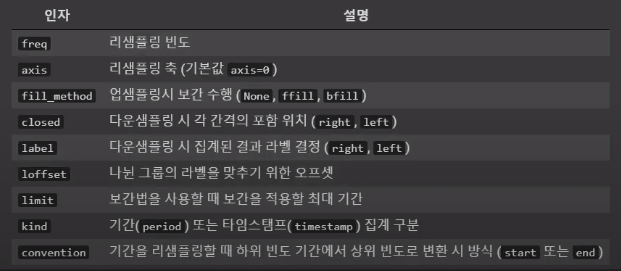

In [418]:
dr = pd.date_range('2020-01-01', periods = 200, freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index = dr)
ts

2020-01-01   -1.151192
2020-01-02   -0.058428
2020-01-03    0.002607
2020-01-04   -1.407677
2020-01-05   -1.139098
                ...   
2020-07-14    0.348003
2020-07-15   -1.393461
2020-07-16    0.753021
2020-07-17   -0.513770
2020-07-18   -0.145402
Freq: D, Length: 200, dtype: float64

In [419]:
# M으로 바뀌고 mean값으로 상위로 집계
ts.resample('M').mean()

2020-01-31   -0.174243
2020-02-29   -0.016183
2020-03-31   -0.182168
2020-04-30   -0.429681
2020-05-31    0.152009
2020-06-30    0.389820
2020-07-31   -0.020819
Freq: M, dtype: float64

In [420]:
ts.resample('M', kind = 'period').mean()

2020-01   -0.174243
2020-02   -0.016183
2020-03   -0.182168
2020-04   -0.429681
2020-05    0.152009
2020-06    0.389820
2020-07   -0.020819
Freq: M, dtype: float64

In [421]:
dr = pd.date_range('2020-01-01', periods = 10, freq = 'T')
ts = pd.Series(np.arange(10), index = dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [422]:
# 2분 단위로 변경되고 sum으로 합쳐짐
ts.resample('2T', closed='left').sum()

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64

In [423]:
# 00시 전의 시간까지 기준이 되서 됨
ts.resample('2T', closed='right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [424]:
ts.resample('2T', closed='right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [426]:
# -1초씩 적용됨
ts.resample('2T', closed='right', label = 'right', loffset = '-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [427]:
# open(시가), high(고가), low(저가), close(종가)
ts.resample('2T').ohlc()

,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


In [428]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  index = pd.date_range('2019-10-01', periods = 10, freq = 'M'),
                  columns = ['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2019-10-31,-0.358782,0.456479,-0.357229,-0.117664
2019-11-30,-0.023799,1.273604,0.861855,-0.439027
2019-12-31,-0.788781,0.811230,0.231226,0.719695
2020-01-31,-1.548336,0.757642,0.725265,-0.490988
2020-02-29,0.118140,-0.410026,1.233779,-0.783961
2020-03-31,-0.198059,-1.165374,0.458425,-0.296923
2020-04-30,-1.109288,-0.709023,-0.337465,-0.480064
2020-05-31,0.106895,-0.224326,0.308928,0.375433
2020-06-30,1.138816,0.481674,-1.100167,-0.116475
2020-07-31,-0.350790,1.026591,0.045853,-0.351486


In [429]:
# 년 기준으로 리샘플링
df.resample('Y').asfreq()

,C1,C2,C3,C4
2019-12-31,-0.788781,0.81123,0.231226,0.719695
2020-12-31,NaN,NaN,NaN,NaN


In [430]:
# 주의 금요일을 기준으로 리샘플링, 안의 값이 있는 곳만 값이 나타남
df.resample('W-FRI').asfreq()

,C1,C2,C3,C4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [431]:
# 시간단위를 지정하지않아서 누락값들이 많이 발생함
df.resample('H').asfreq()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [432]:
# forward fill로 앞의 값으로 누락값을 채움
df.resample('H').ffill()

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 01:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 02:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 03:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 04:00:00,-0.358782,0.456479,-0.357229,-0.117664
...,...,...,...,...
2020-07-30 20:00:00,1.138816,0.481674,-1.100167,-0.116475
2020-07-30 21:00:00,1.138816,0.481674,-1.100167,-0.116475
2020-07-30 22:00:00,1.138816,0.481674,-1.100167,-0.116475
2020-07-30 23:00:00,1.138816,0.481674,-1.100167,-0.116475


In [433]:
# limit으로 채우는 걸 제한이 가능한데, 현재는 2로해서 2개만 채워짐
df.resample('H').ffill(limit = 2)

,C1,C2,C3,C4
2019-10-31 00:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 01:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 02:00:00,-0.358782,0.456479,-0.357229,-0.117664
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [434]:
df.resample('Q-DEC').mean()

,C1,C2,C3,C4
2019-12-31,-0.390454,0.847104,0.245284,0.054335
2020-03-31,-0.542752,-0.272586,0.805823,-0.523957
2020-06-30,0.045474,-0.150558,-0.376235,-0.073702
2020-09-30,-0.350790,1.026591,0.045853,-0.351486


In [435]:
df.resample('Y').mean()

,C1,C2,C3,C4
2019-12-31,-0.390454,0.847104,0.245284,0.054335
2020-12-31,-0.263232,-0.034692,0.190660,-0.306352


### 무빙 윈도우(Moving Window)

In [436]:
df = pd.DataFrame(np.random.randn(300, 4),
                  index = pd.date_range('2020-01-01', periods = 300, freq = 'D'),
                  columns = ['C1', 'C2', 'C3', 'C4'])
df

,C1,C2,C3,C4
2020-01-01,0.981829,-1.624332,1.249855,-0.828369
2020-01-02,0.064456,0.235587,-1.429850,0.732130
2020-01-03,0.732111,-0.725077,1.771528,-0.370547
2020-01-04,0.663399,0.379289,0.730996,0.479307
2020-01-05,0.878236,-0.114544,0.150052,-0.537345
...,...,...,...,...
2020-10-22,-1.288407,0.024638,-0.273080,0.405632
2020-10-23,-1.236487,-1.128054,-0.122665,1.226549
2020-10-24,-0.685500,-1.687634,-0.169984,0.582250
2020-10-25,0.396314,-0.684012,0.607922,0.184997


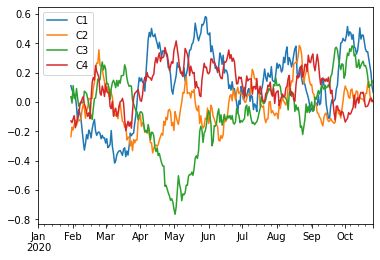

In [437]:
# plot()을 통해서 30일치 평균을 확인할 수 있음
df.rolling(30).mean().plot()

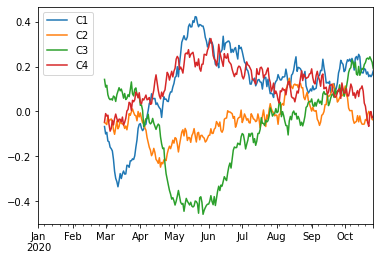

In [438]:
# 60일 기준
df.rolling(60).mean().plot()

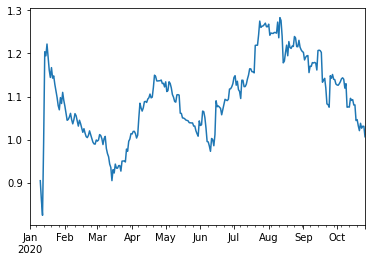

In [439]:
# C1에 대해서만 그리기
df.C1.rolling(60, min_periods = 10).std().plot()

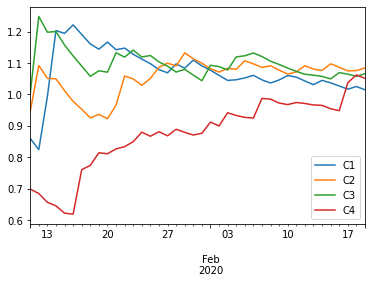

In [440]:
# 슬라이싱으로 일부부만 보기가 가능
df.rolling(60, min_periods = 10).std()[10:50].plot()

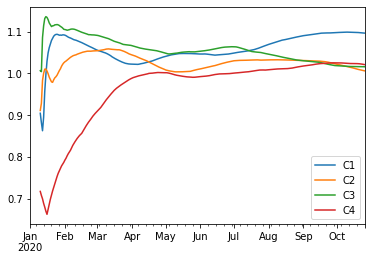

In [441]:
# expanding으로 계속 확장됨
df.rolling(60, min_periods = 10).std().expanding().mean().plot()

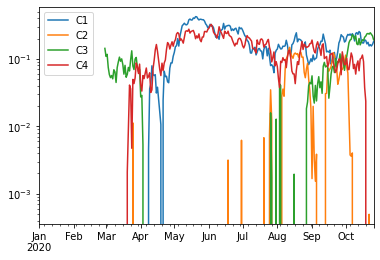

In [442]:
# logy = True을 통해서 로그 스케일로 그릴 수 있음, y축이 로그 스케일
df.rolling(60).mean().plot(logy = True)

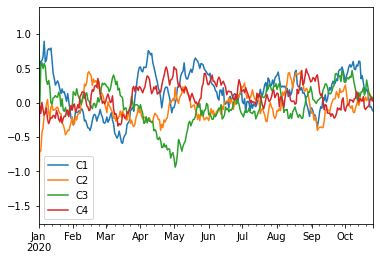

In [443]:
df.rolling('20D').mean().plot()

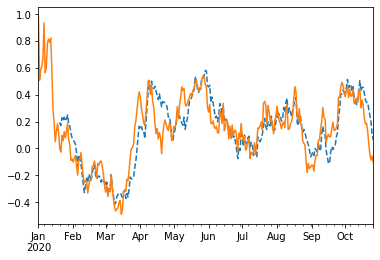

In [444]:
# style을 통해 지정할 수 있음
# ewm은 rolling과 expanding을 같이 사용하는 아이임
# 주황색은 ewm, 파란색은 rolling
df.C1.rolling(30, min_periods = 20).mean().plot(style ='--', label = 'Simple MA')
df.C1.ewm(span = 30).mean().plot(style ='-', label = ('EWMA'))

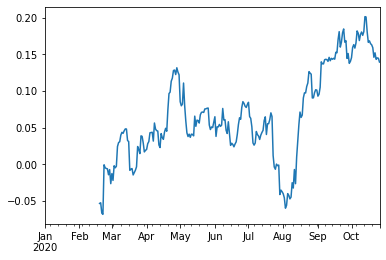

In [445]:
df.C1.rolling(100, min_periods = 50).corr(df.C3).plot()

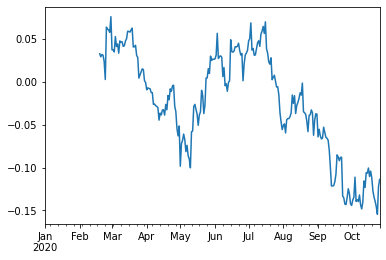

In [446]:
df.C2.rolling(100, min_periods = 50).corr(df.C4).plot()

## 데이터 읽기 및 저장


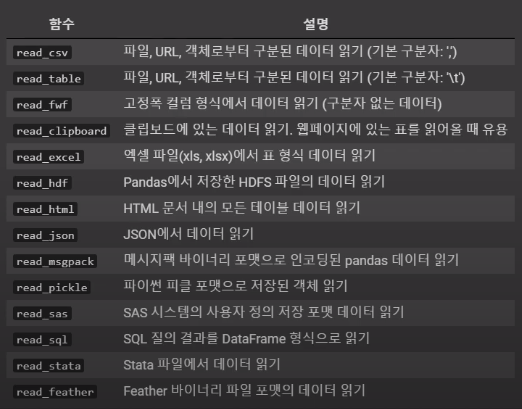

### 텍스트 파일 읽기/쓰기

In [447]:
# csv 파일을 생성
# 첫번째줄은 헤더
%%writefile example.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example.csv


In [448]:
# example.csv가 생성됨을 확인
!ls

example.csv  sample_data


In [449]:
pd.read_csv('example.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [450]:
# header를 지정하지않고 저장하기
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [451]:
# 헤더가 없기때문에 header = None 적기
# 없으니 알아서 0부터해서 적용됨
pd.read_csv('example2.csv', header = None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [452]:
# names를 통해서 직접 header를 지정할 수 있음
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [453]:
# text컬럼 자체가 인덱스 컬럼으로 감
pd.read_csv('example2.csv', names = ['a', 'b', 'c', 'd', 'e', 'text'], index_col = 'text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [454]:
# 텍스트파일은 비정제된 데이터인 경우가 많음
# 스페이스바로 쓰여짐
%%writefile example3.txt
  a      b      c
1 0.1   0.2    0.3
2 0.4   0.5    0.6
3 0.7   0.8    0.9

Writing example3.txt


In [455]:
# 스페이스바로 구분되어있어서 sep = '\s+'으로 지정해서 사용
pd.read_table('example3.txt', sep = '\s+')

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [456]:
# 설명들이 적혀있는 파일
%%writefile example4.csv
# 파일 설명
a, b, c, d, e, text
# 컬럼은 a, b, c, d, e와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [457]:
# 지정해서 row를 skip함
pd.read_csv('example4.csv', skiprows = [0, 2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [458]:
# 누락값을 주기
%%writefile example5.csv
a, b, c, d, e, text
1, 2, Na, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Writing example5.csv


In [459]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,Na,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv


In [460]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example6.csv


In [461]:
# 일부만 가져오고 싶을 때
# nrows로 가져올 수 있음.
pd.read_csv('example6.csv', nrows = 5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10,pandas


In [462]:
# 데이터프레임
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10,pandas
5,11,12,13,14,15,csv
6,1,2,3,4,5,hi
7,6,7,8,9,10,pandas
8,11,12,13,14,15,csv
9,1,2,3,4,5,hi


In [463]:
# 현재 있는 정보를 csv로 저장
df.to_csv('output.csv')

In [464]:
# csv저장 확인
!cat output.csv

,a, b, c, d, e, text
0,1,2,3,4,5, hi
1,6,7,8,9,10, pandas
2,11,12,13,14,15, csv
3,1,2,3,4,5, hi
4,6,7,8,9,10, pandas
5,11,12,13,14,15, csv
6,1,2,3,4,5, hi
7,6,7,8,9,10, pandas
8,11,12,13,14,15, csv
9,1,2,3,4,5, hi
10,6,7,8,9,10, pandas
11,11,12,13,14,15, csv
12,1,2,3,4,5, hi
13,6,7,8,9,10, pandas
14,11,12,13,14,15, csv


In [465]:
dr = pd.date_range('2020-01-01', periods = 10)
ts  = pd.Series(np.arange(10), index = dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [466]:
ts.to_csv('ts.csv', header = ['value'])

In [467]:
!cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [468]:
# json파일 생성
# ""로 안하면 불러올 때, 오류남
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

Writing example.json


In [469]:
# json파일 확인
!cat example.json

[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":6, "b":7, "c":8, "d":9, "e":10},
 {"a":11, "b":12, "c":13, "d":14, "e":15}]

In [470]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [471]:
# 시계열을 json파일로
ts.to_json('output.json')

In [472]:
# 시계열에 대해서도 json으로 잘 처리됨
!cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [473]:
df.to_json('output.json')

In [474]:
!cat output.json

{"a":{"0":1,"1":6,"2":11,"3":1,"4":6,"5":11,"6":1,"7":6,"8":11,"9":1,"10":6,"11":11,"12":1,"13":6,"14":11}," b":{"0":2,"1":7,"2":12,"3":2,"4":7,"5":12,"6":2,"7":7,"8":12,"9":2,"10":7,"11":12,"12":2,"13":7,"14":12}," c":{"0":3,"1":8,"2":13,"3":3,"4":8,"5":13,"6":3,"7":8,"8":13,"9":3,"10":8,"11":13,"12":3,"13":8,"14":13}," d":{"0":4,"1":9,"2":14,"3":4,"4":9,"5":14,"6":4,"7":9,"8":14,"9":4,"10":9,"11":14,"12":4,"13":9,"14":14}," e":{"0":5,"1":10,"2":15,"3":5,"4":10,"5":15,"6":5,"7":10,"8":15,"9":5,"10":10,"11":15,"12":5,"13":10,"14":15}," text":{"0":" hi","1":" pandas","2":" csv","3":" hi","4":" pandas","5":" csv","6":" hi","7":" pandas","8":" csv","9":" hi","10":" pandas","11":" csv","12":" hi","13":" pandas","14":" csv"}}

### 이진 데이터 파일 읽기/쓰기

In [475]:
df = pd.read_csv('example.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [476]:
# pickle형태로 변환해서 저장을 하고 다시 그걸 불러옴
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [477]:
df = pd.DataFrame({'a': np.random.randn(100),
                   'b': np.random.randn(100),
                   'c': np.random.randn(100)})
df

,a,b,c
0,0.273838,0.924492,2.309703
1,-1.544266,-0.211175,-0.680720
2,0.162427,-1.162562,0.638498
3,0.277126,0.297098,1.114786
4,-0.224034,-0.854431,-0.543602
...,...,...,...
95,-0.063332,0.193306,-0.867604
96,-0.301305,0.027670,0.381216
97,-1.181521,0.200868,-1.278233
98,0.577580,0.956454,0.236323


In [478]:
# HDF의 확장자는 h5
# csv같은 파일이라고 생각하면되는데, 좀 더 빨리 입출력이 가능
h = pd.HDFStore('data.h5')
h['obj1'] = df
h['obj_col1'] = df['a']
h['obj_col2'] = df['b']
h['obj_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5

In [479]:
h['obj1']

,a,b,c
0,0.273838,0.924492,2.309703
1,-1.544266,-0.211175,-0.680720
2,0.162427,-1.162562,0.638498
3,0.277126,0.297098,1.114786
4,-0.224034,-0.854431,-0.543602
...,...,...,...
95,-0.063332,0.193306,-0.867604
96,-0.301305,0.027670,0.381216
97,-1.181521,0.200868,-1.278233
98,0.577580,0.956454,0.236323


In [480]:
# put으로 넣을 수 있고 format도 지정 가능
h.put('obj2', df, format = 'table')

In [481]:
# table은 데이터베이스는 아니지만 select와 where을 사용할 수 있음
h.select('obj2', where = ['index > 50 and index <= 60'])

,a,b,c
51,0.484896,-1.238995,0.561407
52,0.189246,-1.693528,0.356725
53,-1.762724,0.518306,0.281088
54,-0.834432,-0.445351,-0.430723
55,0.847705,-0.762738,0.613679
56,-2.388085,-0.520457,-0.789405
57,-0.148121,-0.314718,-1.384838
58,-0.530111,0.158801,-1.737396
59,0.964456,1.033925,0.162003
60,1.856541,-1.999722,0.337238


In [482]:
# 데이터를 읽었으면 닫아주기
h.close()

In [483]:
# hdf로 만들기
df.to_hdf('data.h5', 'obj3', format = 'table')

In [484]:
pd.read_hdf('data.h5', 'obj3', where = ['index < 10'])

,a,b,c
0,0.273838,0.924492,2.309703
1,-1.544266,-0.211175,-0.680720
2,0.162427,-1.162562,0.638498
3,0.277126,0.297098,1.114786
4,-0.224034,-0.854431,-0.543602
5,0.390470,0.559650,0.115585
6,-0.072976,-0.311938,-0.291140
7,-1.194877,0.045501,1.880730
8,0.234009,1.051160,0.778739
9,-0.749360,-1.672993,0.285529


In [485]:
# 엑셀의 Sheet도 정할 수 있음
df.to_excel('example.xlsx', 'Sheet1')

In [486]:
!ls

data.h5       example3.txt  example6.csv  example.xlsx	sample_data
df_pickle     example4.csv  example.csv   output.csv	ts.csv
example2.csv  example5.csv  example.json  output.json


In [487]:
pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,0.273838,0.924492,2.309703
1,1,-1.544266,-0.211175,-0.680720
2,2,0.162427,-1.162562,0.638498
3,3,0.277126,0.297098,1.114786
4,4,-0.224034,-0.854431,-0.543602
...,...,...,...,...
95,95,-0.063332,0.193306,-0.867604
96,96,-0.301305,0.027670,0.381216
97,97,-1.181521,0.200868,-1.278233
98,98,0.577580,0.956454,0.236323


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터

In [488]:
a = np.array([1, 2, None, 4, 5])
a

array([1, 2, None, 4, 5], dtype=object)

In [489]:
# None이 포함되면 사용할 수 없음.
a.sum()

TypeError: ignored

#### NaN: 누락된 수치 데이터

In [490]:
# NaN을 float값으로 처리함
a = np.array([1, 2, np.nan, 4, 5])
a.dtype

dtype('float64')

In [491]:
0 + np.nan

nan

In [492]:
np.nan + np.nan

nan

In [493]:
a.sum(), a.min(), a.max()

(nan, nan, nan)

In [494]:
# NaN이 들어있음을 고려해서 만든 함수
np.nansum(a), np.nanmin(a), np.nanmax(a)

(12.0, 1.0, 5.0)

In [495]:
# Series에서는 None도 NaN으로 변환
pd.Series([1, 2, np.nan, 4, None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [496]:
s = pd.Series(range(5), dtype = int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [497]:
# None을 NaN
s[0] = None
s

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [498]:
s[3] = np.nan
s

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [499]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리


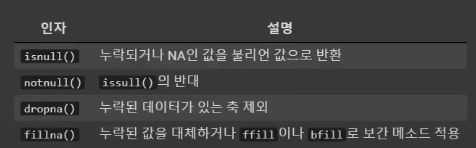

In [500]:
s = pd.Series([1,2, np.nan, 'String', None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [501]:
# 누락값을 True로 출력
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [502]:
# Null이 아닌 값만 출력
s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [503]:
# Null값을 없앤다
s.dropna()

0         1
1         2
3    String
dtype: object

In [504]:
df.dropna(axis = 'columns')

,a,b,c
0,0.273838,0.924492,2.309703
1,-1.544266,-0.211175,-0.680720
2,0.162427,-1.162562,0.638498
3,0.277126,0.297098,1.114786
4,-0.224034,-0.854431,-0.543602
...,...,...,...
95,-0.063332,0.193306,-0.867604
96,-0.301305,0.027670,0.381216
97,-1.181521,0.200868,-1.278233
98,0.577580,0.956454,0.236323


In [505]:
# df[3]를 NaN으로 변경
df[3] = np.nan
df

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


In [506]:
# null값들을 다 지워버림
df.dropna(axis = 'columns', how = 'all')

,a,b,c
0,0.273838,0.924492,2.309703
1,-1.544266,-0.211175,-0.680720
2,0.162427,-1.162562,0.638498
3,0.277126,0.297098,1.114786
4,-0.224034,-0.854431,-0.543602
...,...,...,...
95,-0.063332,0.193306,-0.867604
96,-0.301305,0.027670,0.381216
97,-1.181521,0.200868,-1.278233
98,0.577580,0.956454,0.236323


In [507]:
# row단위로 제거하는데 thresh가 3이므로 칼럼3까진 못감
df.dropna(axis = 'rows', thresh = 3)

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


In [508]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [509]:
# 특정값으로 비어있는값을 채워줌
s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [510]:
# 앞의 값으로 채우기
s.fillna(method = 'ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [511]:
# 뒤의 값으로 채우기
s.fillna(method = 'bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [512]:
df

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


In [513]:
# 데이터프레임에서 누락값 처리
# axis = 0 -> 행
df.fillna(method = 'ffill', axis = 0)

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


In [514]:
# axis = 1 -> 열
df.fillna(method = 'ffill', axis = 1)

,a,b,c,3
0,0.273838,0.924492,2.309703,2.309703
1,-1.544266,-0.211175,-0.680720,-0.680720
2,0.162427,-1.162562,0.638498,0.638498
3,0.277126,0.297098,1.114786,1.114786
4,-0.224034,-0.854431,-0.543602,-0.543602
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,-0.867604
96,-0.301305,0.027670,0.381216,0.381216
97,-1.181521,0.200868,-1.278233,-1.278233
98,0.577580,0.956454,0.236323,0.236323


In [516]:
df.fillna(method = 'bfill', axis = 0)

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


In [517]:
# 뒤의 값이 없어서 채워지지않음
df.fillna(method = 'bfill', axis = 1)

,a,b,c,3
0,0.273838,0.924492,2.309703,NaN
1,-1.544266,-0.211175,-0.680720,NaN
2,0.162427,-1.162562,0.638498,NaN
3,0.277126,0.297098,1.114786,NaN
4,-0.224034,-0.854431,-0.543602,NaN
...,...,...,...,...
95,-0.063332,0.193306,-0.867604,NaN
96,-0.301305,0.027670,0.381216,NaN
97,-1.181521,0.200868,-1.278233,NaN
98,0.577580,0.956454,0.236323,NaN


### 중복 제거

In [524]:
# 중복된 값을 가진 데이터프레임
df = pd.DataFrame({'c1': ['a', 'b', 'c'] * 2 + ['b'] + ['c'],
                   'c2' : [1, 2, 1, 1, 2, 3, 3, 4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [525]:
# 중복된 부분이 불리언값으로 나오고 중복되면 True
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [526]:
# drop_duplicates(): 중복제거 
df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [527]:
# nan대신 -999라고 받았을 때, 값을 치환하기
s = pd.Series([1., 2., -999., 3., -1000., 4. ])
s

0       1.0
1       2.0
2    -999.0
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [528]:
# nan으로 값 치환
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [529]:
# -1000도 바꾸기
s.replace([-999, -1000], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [530]:
# 원하는 값으로 치환도 가능
s.replace([-999, -1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    3.0
4    0.0
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly